In [ ]:
# Business Objective
# 1. To understand the driving factors behind the loan default and take actions to manage the risk
# 2. The key areas to be explored are:
# Risk assessment of loan applications: based on gender, income, housing type, KYC (Know your customer) documents, previous applications, amount, type of loan etc.
#Understanding repayment and default patterns
#To get insight on denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import scipy.stats as ss
pd.set_option('display.max_columns', 130)

In [2]:
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
app_data.shape

(307511, 122)

In [4]:
list(app_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [5]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
columns_with_nan = app_data.columns[app_data.isnull().any()].tolist()
columns_with_nan

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [10]:
len(columns_with_nan)

67

In [11]:
null_perc = app_data.isnull().sum()/len(app_data)*100
null_perc.sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [12]:
for column in columns_with_nan:
    if app_data[column].isnull().sum()*100.0/307511 > 45:
         app_data.drop(column,1, inplace=True)

In [13]:
app_data.shape

(307511, 73)

In [14]:
null_perc = app_data.isnull().sum()/len(app_data)*100
null_perc.sort_values(ascending = False).head(20)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
dtype: float64

In [15]:
print (app_data['OCCUPATION_TYPE'].dtypes)

object


In [16]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [17]:
app_data.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [18]:
# OCCUPATION_TYPE is a categorical column. Null value for OCCUPATION_TYPE is 31% and value of mode for this column is 26% i.e. for Laborers. So, if we will use mode to impute the null values then the column will be biased for Laborers. In this case we should make a new column for these missing values.

In [19]:
print (app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].dtypes)

float64


In [20]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

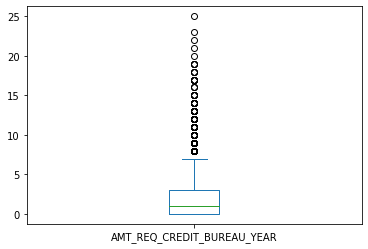

In [21]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot(kind = 'box')
plt.show()

In [22]:
# AMT_REQ_CREDIT_BUREAU_YEAR is a numerical column and it has high number of outliers so in this case we will impute null values with the median value of this column.

In [23]:
print (app_data['NAME_TYPE_SUITE'].dtypes)

object


In [24]:
app_data.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [25]:
# NAME_TYPE_SUITE has 0.42% missing values and since it is a categorical column. So, we should impute null values with mode for this column i.e.Unaccompanied. 

In [26]:
print (app_data['EXT_SOURCE_2'].dtypes)

float64


In [27]:
app_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

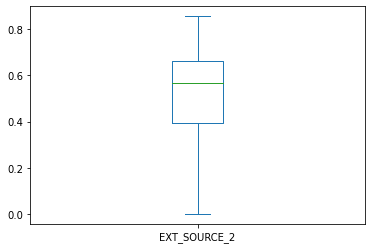

In [28]:
app_data['EXT_SOURCE_2'].plot(kind = 'box')
plt.show()

In [29]:
# EXT_SOURCE_2 is a numerical column and it has no outliers so, we should impute null values with the mean value of this column.

In [30]:
print (app_data['EXT_SOURCE_3'].dtypes)

float64


In [31]:
app_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

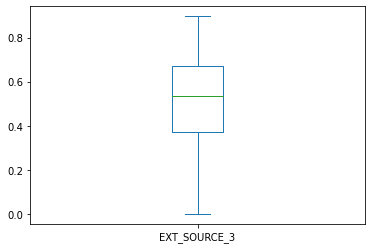

In [32]:
app_data['EXT_SOURCE_3'].plot(kind = 'box')
plt.show()

In [33]:
# EXT_SOURCE_3 is a numerical column and it has no outliers so, we should impute null values with the mean value of this column.

In [34]:
print (app_data['AMT_ANNUITY'].dtypes)

float64


In [35]:
app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

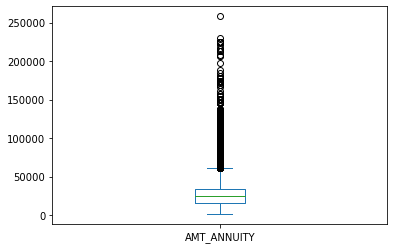

In [36]:
app_data['AMT_ANNUITY'].plot(kind = 'box')
plt.show()

In [37]:
# AMT_ANNUITY is a numerical column and it has high number of outliers so in this case we will impute the null values with the median value of this column.

In [38]:
print (app_data['AMT_GOODS_PRICE'].dtypes)

float64


In [39]:
app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

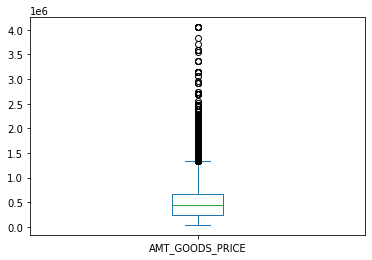

In [40]:
app_data['AMT_GOODS_PRICE'].plot(kind = 'box')
plt.show()

In [41]:
# AMT_GOODS_PRICE is a numerical column and it has high number of outliers so in this case we should impute the null values with the median value of this column.

In [42]:
print (app_data['CNT_FAM_MEMBERS'].dtypes)

float64


In [43]:
app_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

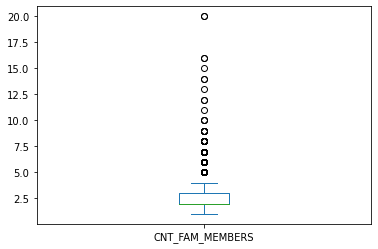

In [44]:
app_data['CNT_FAM_MEMBERS'].plot(kind = 'box')
plt.show()

In [45]:
# CNT_FAM_MEMBERS is a numerical column and it has outliers and its mean value is a float so in this case we should impute null values with the median value of this column (No of family members can not be a float).

In [46]:
app_data.head(60)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.00

In [47]:
app_data.tail(60)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307451,456190,0,Cash loans,M,Y,N,1,450000.0,545040.0,25407.0,450000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.019101,-11523,-2500,-7.0,-2062,1,1,0,1,0,0,Core staff,3.0,2,2,TUESDAY,11,0,0,0,0,0,0,Police,0.253372,0.701696,5.0,1.0,5.0,0.0,-1938.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307452,456191,0,Cash loans,F,Y,N,2,153000.0,1350000.0,46926.0,1350000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-13128,-397,-3964.0,-2745,1,1,1,1,1,0,NaN,4.0,2,2,THURSDAY,14,0,0,0,0,0,0,Restaurant,0.541303,0.754406,0.0,0.0,0.0,0.0,-741.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
307453,456192,0,Cash loans,F,N,N,1,135000.0,450000.0,24412.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018801,-11280,-517,-910.0,-885,1,1,1,1,1,0,Sales staff,3.0,2,2,THURSDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.092387,0.425893,0.0,0.0,0.0,0.0,-285.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307454,456193,0,Cash loans,M,N,N,0,157500.0,1332000.0,39078.0,1332000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.008575,-15552,-302,-7785.0,-4586,1,1,1,1,1,0,Security staff,2.0,2,2,THURSDAY,15,0,1,1,0,1,1,Security,0.661427,0.591977,0.0,0.0,0.0,0.0,-390.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307455,456194,0,Cash loans,M,N,Y,1,157500.0,225000.0,15165.0,225000.0,Unaccompanied,Commercial associate,Incomplete higher,Married,House / apartment,0.016612,-13170,-880,-2665.0,-4060,1,1,0,1,0,0,Sales staff,3.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.427019,0.652897,0.0,0.0,0.0,0.0,-2615.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-20246,-5452,-5480.0,-3784,1,1,1,1,1,0,Cleaning staff,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Business Entity Type 2,0.534302,0.723837,0.0,0.0,0.0,0.0,-2299.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307457,456196,0,Revolving loans,F,N,Y,2,202500.0,360000.0,18000.0,360000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.035792,-12778,-3582,-6804.0,-4414,1,1,0,1,0,0,Sales staff,4.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Self-employed,0.680098,0.638044,0.0,0.0,0.0,0.0,-2326.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
307458,456197,0,Cash loans,F,N,Y,0,112500.0,239850.0,23364.0,225000.0,Unaccompanied,Working,Secondary / secondary special

In [48]:
app_data.shape

(307511, 73)

In [49]:
# After removing columns with >45% null values, the app_data has now 73 columns and 307511 rows.

In [50]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [51]:
# check the unique values for few important columns

In [52]:
app_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [53]:
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [54]:
# Here Gender type is not properly mentioned at 4 places so we will replace its value with 'F'(as this category has higher value).

In [55]:
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].replace(['XNA'],'F')
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [56]:
app_data['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [57]:
app_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [58]:
app_data['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [59]:
#Here FAMILY_STATUS for 2 applicants has not been mentioned so we will replace its value with 'Married'(as this category has higher value).

In [60]:
app_data['NAME_FAMILY_STATUS'] = app_data['NAME_FAMILY_STATUS'].replace(['Unknown'],'Married')
app_data['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [61]:
app_data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [62]:
app_data['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [63]:
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [64]:
app_data['WEEKDAY_APPR_PROCESS_START'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [65]:
app_data['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [66]:
app_data['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [67]:
app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [68]:
# ORGANIZATION_TYPE has high value of 'XNA' so we will leave it as a separate category.

In [69]:
# Changing of the negative values for the columns: "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE" and creating a new column for them in terms of years.  

In [70]:
app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].abs()
app_data['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [71]:
app_data['Age_Years'] = app_data['DAYS_BIRTH']//365
app_data['Age_Years']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: Age_Years, Length: 307511, dtype: int64

In [72]:
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].abs()
app_data['DAYS_EMPLOYED']

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [73]:
app_data['Employement_Years'] = app_data['DAYS_EMPLOYED']//365
app_data['Employement_Years']

0            1
1            3
2            0
3            8
4            8
          ... 
307506       0
307507    1000
307508      21
307509      13
307510       3
Name: Employement_Years, Length: 307511, dtype: int64

In [74]:
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].abs()
app_data['DAYS_REGISTRATION']

0         3648.0
1         1186.0
2         4260.0
3         9833.0
4         4311.0
           ...  
307506    8456.0
307507    4388.0
307508    6737.0
307509    2562.0
307510    5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [75]:
app_data['Registration_Years'] = app_data['DAYS_REGISTRATION']//365
app_data['Registration_Years']

0          9.0
1          3.0
2         11.0
3         26.0
4         11.0
          ... 
307506    23.0
307507    12.0
307508    18.0
307509     7.0
307510    14.0
Name: Registration_Years, Length: 307511, dtype: float64

In [76]:
app_data['DAYS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH'].abs()
app_data['DAYS_ID_PUBLISH']

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

In [77]:
app_data['ID_Years'] = app_data['DAYS_ID_PUBLISH']//365
app_data['ID_Years']

0          5
1          0
2          6
3          6
4          9
          ..
307506     5
307507    11
307508    14
307509     2
307510     1
Name: ID_Years, Length: 307511, dtype: int64

In [78]:
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].abs()
app_data['DAYS_LAST_PHONE_CHANGE']

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [79]:
app_data['YEARS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE']//365
app_data['YEARS_LAST_PHONE_CHANGE']

0         3.0
1         2.0
2         2.0
3         1.0
4         3.0
         ... 
307506    0.0
307507    0.0
307508    5.0
307509    0.0
307510    2.0
Name: YEARS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [80]:
# Checking the app_data after changing the values of the columns having negative data of days into years (in a separate column).

In [81]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years,Employement_Years,Registration_Years,ID_Years,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9.0,5,3.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,11.0,6,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8,11.0,9,3.0


In [82]:
app_data.shape

(307511, 78)

In [83]:
# Detecting outliers for numerical columns

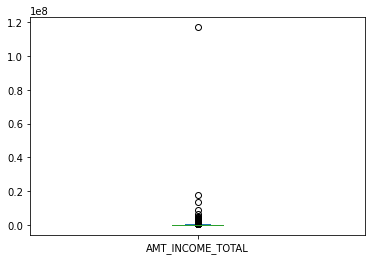

In [84]:
# 1. AMT_INCOME_TOTAL
app_data['AMT_INCOME_TOTAL'].plot(kind = 'box')
plt.show()

In [85]:
app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [86]:
app_data['AMT_INCOME_TOTAL'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 1.0])

0.75       202500.0
0.80       225000.0
0.85       234000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [87]:
# The 95th percentile value for the column "AMT_INCOME_TOTAL" is 337500.0. However its max value is 117000000.0 which is definitely an outlier and will affect the analysis. Here we should cap the max value at 95th percentile i.e. 337500.0. 

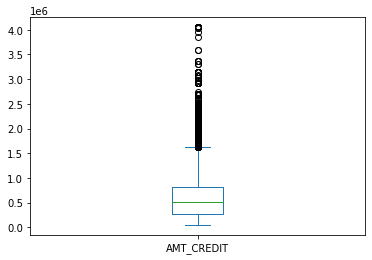

In [88]:
# 2. AMT_CREDIT
app_data['AMT_CREDIT'].plot(kind = 'box')
plt.show()

In [89]:
app_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [90]:
app_data['AMT_CREDIT'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 1.0])

0.75     808650.0
0.80     900000.0
0.85    1024740.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [91]:
# The 95th percentile value for the column "AMT_CREDIT" is 1350000.0. However its max value is 4050000.0 which is definitely an outlier and will affect the analysis. Here we should cap the max value at 95th percentile i.e. 1350000.0. 

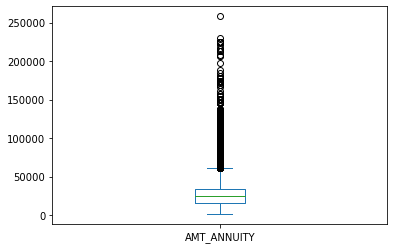

In [92]:
# 3. AMT_ANNUITY - dtype: float64 
app_data['AMT_ANNUITY'].plot(kind = 'box')
plt.show()

In [93]:
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [94]:
app_data['AMT_ANNUITY'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

0.75    34596.0
0.80    37516.5
0.85    40806.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [95]:
# The 95th percentile value for the column "AMT_ANNUITY" is 53325.0. However its max value is 258025.5 which is definitely an outlier. Here we should cap the max value at 95th percentile. 

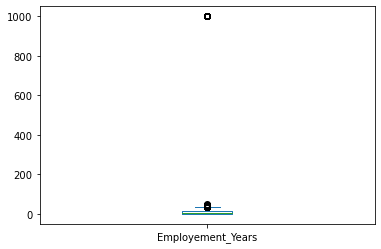

In [96]:
# 4. Employement_Years, dtype: float64
app_data['Employement_Years'].plot(kind = 'box')
plt.show()

In [97]:
app_data['Employement_Years'].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: Employement_Years, dtype: float64

In [98]:
app_data['Employement_Years'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

0.75      15.0
0.80      25.0
0.85    1000.0
0.90    1000.0
0.95    1000.0
0.99    1000.0
Name: Employement_Years, dtype: float64

In [99]:
# The max value for the column Employement_Years is 1000.0 which is definitely an outlier. Here we can cap the max value at 80th percentile i.e. 25.0 years. 

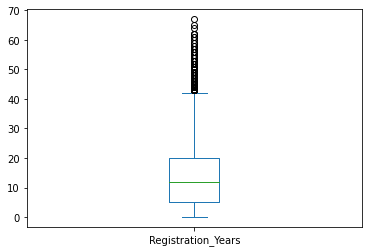

In [100]:
# 5. Registration_Years, dtype: float64
app_data['Registration_Years'].plot(kind = 'box')
plt.show()

In [101]:
app_data['Registration_Years'].describe()

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: Registration_Years, dtype: float64

In [102]:
app_data['Registration_Years'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

0.75    20.0
0.80    22.0
0.85    24.0
0.90    27.0
0.95    31.0
0.99    38.0
Name: Registration_Years, dtype: float64

In [103]:
# The max value for the column Registration_Years is 67.0 which is definitely an outlier. Here we can cap the max value at 90th percentile i.e. 27.0 years. 

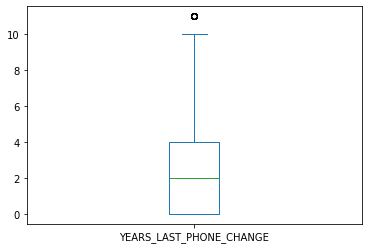

In [104]:
# 6. YEARS_LAST_PHONE_CHANGE, dtype: float64
app_data['YEARS_LAST_PHONE_CHANGE'].plot(kind = 'box')
plt.show()

In [105]:
app_data['YEARS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean          2.225115
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

In [106]:
app_data['YEARS_LAST_PHONE_CHANGE'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

0.75    4.0
0.80    4.0
0.85    5.0
0.90    5.0
0.95    6.0
0.99    8.0
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

In [107]:
# The max value for the column YEARS_LAST_PHONE_CHANGE is 11.0 which is definitely an outlier. Here we can cap the max value at 95th percentile i.e. 6.0 years. 

In [108]:
# Binning of columns

In [109]:
# Age_Years
app_data['AGE_GROUP'] = pd.cut(app_data.Age_Years, [20,30,40,50,60,70],labels = ['20-30','30-40','40-50','50-60','Above 60'])

In [110]:
app_data.AGE_GROUP.value_counts()

30-40       83117
40-50       74401
50-60       67819
20-30       52805
Above 60    29368
Name: AGE_GROUP, dtype: int64

In [111]:
app_data.drop('Age_Years',axis =1, inplace = True)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Employement_Years,Registration_Years,ID_Years,YEARS_LAST_PHONE_CHANGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,9.0,5,3.0,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,0,2.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,11.0,6,2.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8,26.0,6,1.0,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8,11.0,9,3.0,50-60


In [112]:
# AMT_INCOME_TOTAL
app_data['AMT_INCOME_TOTAL'].quantile([0,0.2,0.4,0.6,0.8,1.0])

0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [113]:
app_data['INCOME_GROUP']= pd.qcut(app_data['AMT_INCOME_TOTAL'], q=[0,0.2,0.4,0.6,0.8,1.0],labels=['VeryLow','Low','Medium','High','VeryHigh'])
app_data['INCOME_GROUP'].value_counts()

Low         85756
High        75513
VeryLow     63671
VeryHigh    47118
Medium      35453
Name: INCOME_GROUP, dtype: int64

In [114]:
app_data.drop('AMT_INCOME_TOTAL',axis =1, inplace = True)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Employement_Years,Registration_Years,ID_Years,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,9.0,5,3.0,20-30,High
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,0,2.0,40-50,VeryHigh
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,11.0,6,2.0,50-60,VeryLow
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8,26.0,6,1.0,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8,11.0,9,3.0,50-60,Low


In [115]:
app_data.shape

(307511, 78)

In [116]:
# Dropping of less important columns
app_data = app_data.drop(['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE',
                'REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 
                'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [117]:
# Out of 78 columns 50 columns have been dropped and 28 columns will be used for further analysis.

In [118]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Employement_Years,Registration_Years,ID_Years,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,Laborers,1.0,2,0,Business Entity Type 3,1,9.0,5,3.0,20-30,High
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1,1,0,Core staff,2.0,1,0,School,3,3.0,0,2.0,40-50,VeryHigh
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,Laborers,1.0,2,0,Government,0,11.0,6,2.0,50-60,VeryLow
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,Laborers,2.0,2,0,Business Entity Type 3,8,26.0,6,1.0,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,Core staff,1.0,2,0,Religion,8,11.0,9,3.0,50-60,Low


In [119]:
app_data.shape

(307511, 28)

In [120]:
# Check imbalance percentage

In [284]:
app_data['TARGET'].unique()

array([1, 0], dtype=int64)

In [285]:
app_data['TARGET'].value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

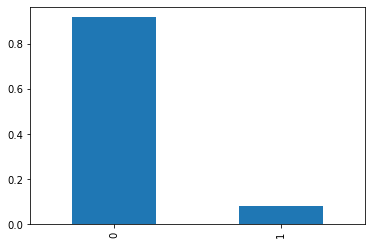

In [288]:
# TARGET
app_data['TARGET'].value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# Imbalance percentage has been detected in the 'TARGET' column. So, we will divide the dataset into 2 sets based on the value of this column.
# If value of 'TARGET' = 1 then client has faced payment difficulties at some point of time (he/she had late payment)
# If value of 'TARGET' = 0 for all other cases.

In [121]:
df_d = app_data[app_data['TARGET']==1] 
df_nd = app_data[app_data['TARGET']==0]

In [122]:
# df_d = Defaulter
# df_nd = Non-Defaulter

In [123]:
# Univariate Analysis of Categorical column

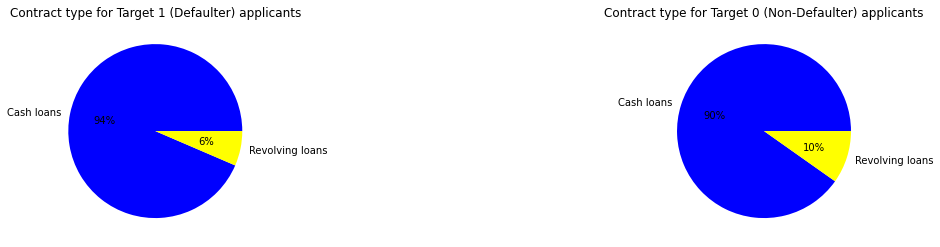

In [124]:
# NAME_CONTRACT_TYPE

colors = ('blue','yellow')
plt.figure(figsize = [20,4])
plt.subplot(1,2,1)
plt.pie(df_d.NAME_CONTRACT_TYPE.value_counts(), labels = ['Cash loans','Revolving loans'],colors = colors,autopct='%1.0f%%')
plt.title('Contract type for Target 1 (Defaulter) applicants')
plt.subplot(1,2,2)
plt.pie(df_nd.NAME_CONTRACT_TYPE.value_counts(), labels = ['Cash loans','Revolving loans'],colors = colors,autopct='%1.0f%%')
plt.title('Contract type for Target 0 (Non-Defaulter) applicants')
plt.show()

In [ ]:
# The majority of defaulters have cash loan
# Revolving loans are less risky as 10% of non-defaulter comes from Revolving loans. 
# The data reveals that majority of loans are Cash loans. 

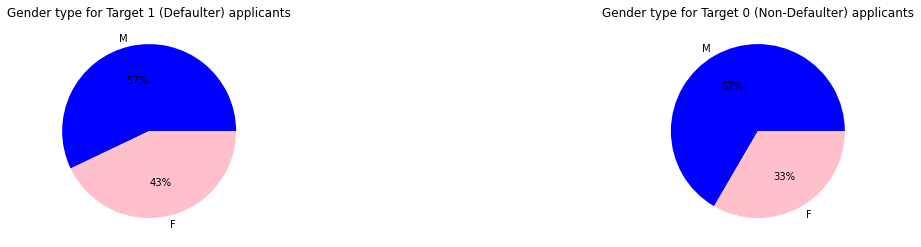

In [125]:
#CODE_GENDER 

colors = ('blue','pink')
plt.figure(figsize = [20,4])
plt.subplot(1,2,1)
plt.pie(df_d.CODE_GENDER.value_counts(), labels = ['M','F'],colors = colors,autopct='%1.0f%%')
plt.title('Gender type for Target 1 (Defaulter) applicants')
plt.subplot(1,2,2)
plt.pie(df_nd.CODE_GENDER.value_counts(), labels = ['M','F'],colors = colors,autopct='%1.0f%%')
plt.title('Gender type for Target 0 (Non-Defaulter) applicants')
plt.show()

In [ ]:
# Percentage of male defaulters is higher than the female.
# 2/3rd of non-defaulters are males while 1/3rd are females

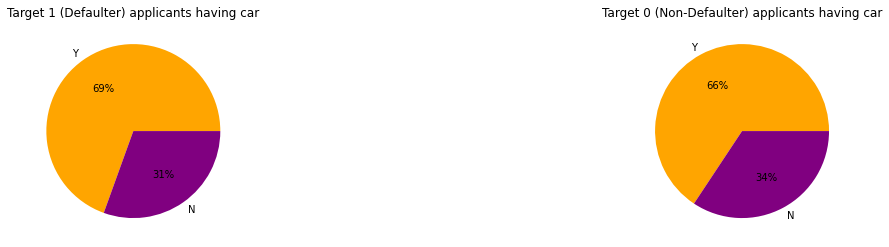

In [126]:
# FLAG_OWN_CAR
colors = ('orange','purple')
plt.figure(figsize = [20,4])
plt.subplot(1,2,1)
plt.pie(df_d.FLAG_OWN_CAR.value_counts(), labels = ['Y','N'],colors = colors,autopct='%1.0f%%')
plt.title('Target 1 (Defaulter) applicants having car')
plt.subplot(1,2,2)
plt.pie(df_nd.FLAG_OWN_CAR.value_counts(), labels = ['Y','N'],colors = colors,autopct='%1.0f%%')
plt.title('Target 0 (Non-Defaulter) applicants having car')
plt.show()

In [ ]:
#Both defaulters and non-defaulters have no significant difference in terms of car ownership and so this paramteter should not be used for risk assessment.
# 1/3rd of both defaulters and non-defaulters don't own a car.

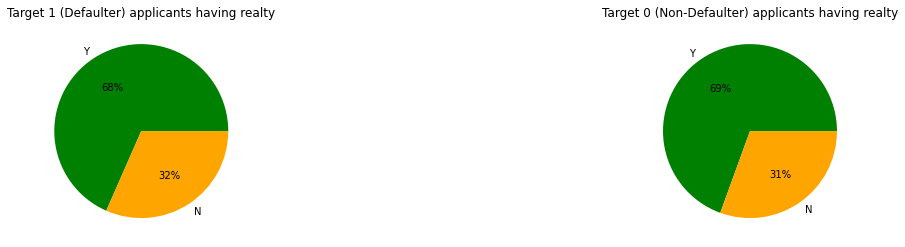

In [127]:
# FLAG_OWN_REALTY

colors = ('green','orange')
plt.figure(figsize = [20,4])
plt.subplot(1,2,1)
plt.pie(df_d.FLAG_OWN_REALTY.value_counts(), labels = ['Y','N'],colors = colors,autopct='%1.0f%%')
plt.title('Target 1 (Defaulter) applicants having realty')
plt.subplot(1,2,2)
plt.pie(df_nd.FLAG_OWN_REALTY.value_counts(), labels = ['Y','N'],colors = colors,autopct='%1.0f%%')
plt.title('Target 0 (Non-Defaulter) applicants having realty')
plt.show()

In [ ]:
# With the current data pattern, there is hardly any difference between defaulters and non-defaulters based on having realty.
# Almost 1/3rd of both the defaulters and non-defaulters own a realty.

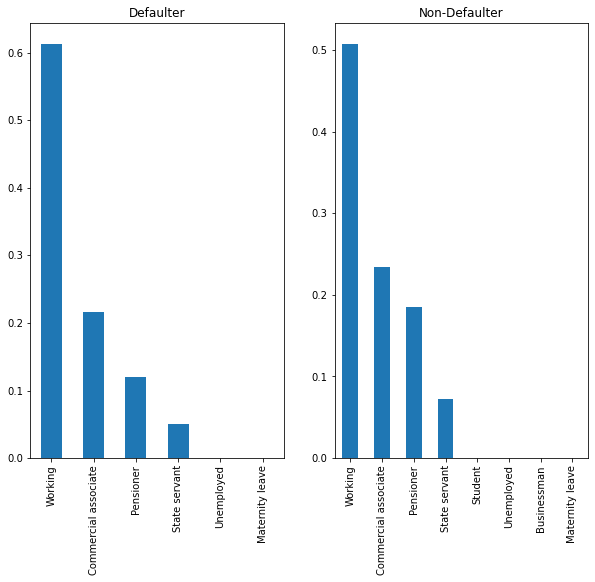

In [129]:
# NAME_INCOME_TYPE

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The majority of data set corresponds to working class.
# The working class is on 1st rank both among defaulter and non-defaulter customers.
# The commercial associates are better in the non-default category.
# The Pensioners and state servants are better in non-defaulting category that defaulting category.


In [131]:
df_d['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Incomplete higher',
       'Higher education', 'Lower secondary', 'Academic degree'],
      dtype=object)

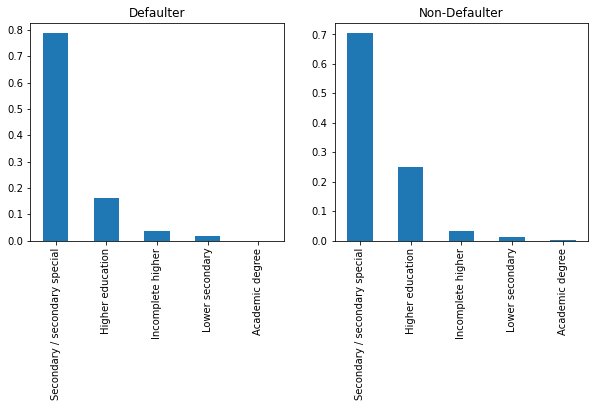

In [133]:
# NAME_EDUCATION_TYPE

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# More than 3/4th defaulters and non-defaulters have secondary/secondary special education. This also underlines the fact that majority of applicants have secondary/secondary special education.
# The percentage of non-defaulters with incomplete higher education is higher than defaulters with incomplete higher education.
# The Higher education and lower secondary contribute very less among both defaulting as well as non-defaulting categories.
# The Academic degree is insignificant for both the categories.

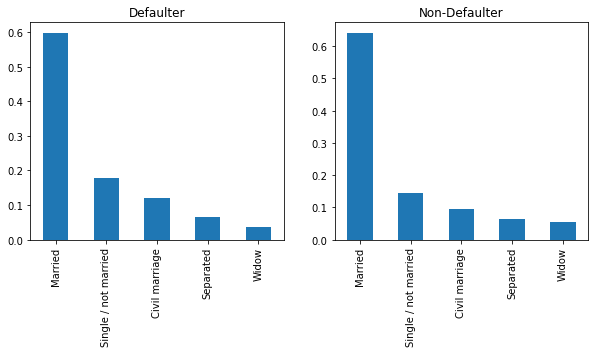

In [134]:
# NAME_FAMILY_STATUS

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The ranking of defaulters and non-defaulters follow same sequence in terms of family status.
# The Married  and Single are top 2 categories in both the defaulter as well as non-defaulter categories.
# The separated and widow are less than 10% in both the defaulter as well as non-defaulter categories.

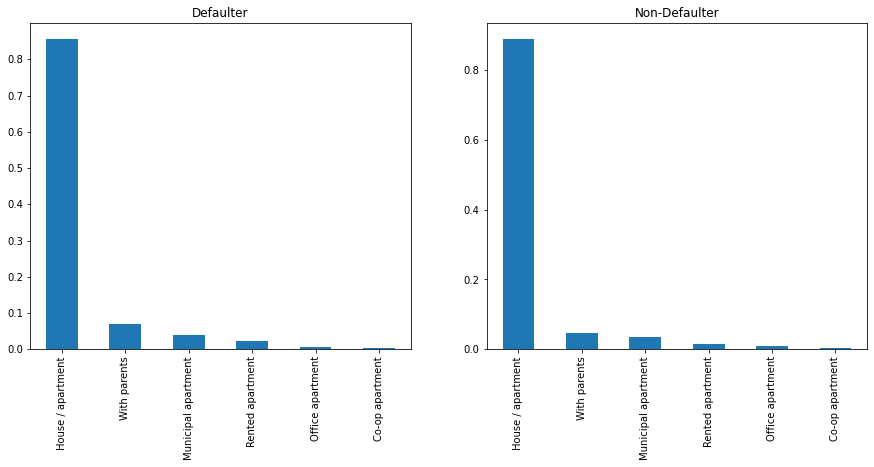

In [135]:
# NAME_HOUSING_TYPE

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The Housing type is apartment for more than 80% of applications for both the defaulter as well as non-defaulter categories.
# The all other Housing type except apartments are less than 10% for both the defaulting as well as non-defaulting categories.
# The sequence of house type in terms of ranking is same in both the defaulting and non-defaulting categories.

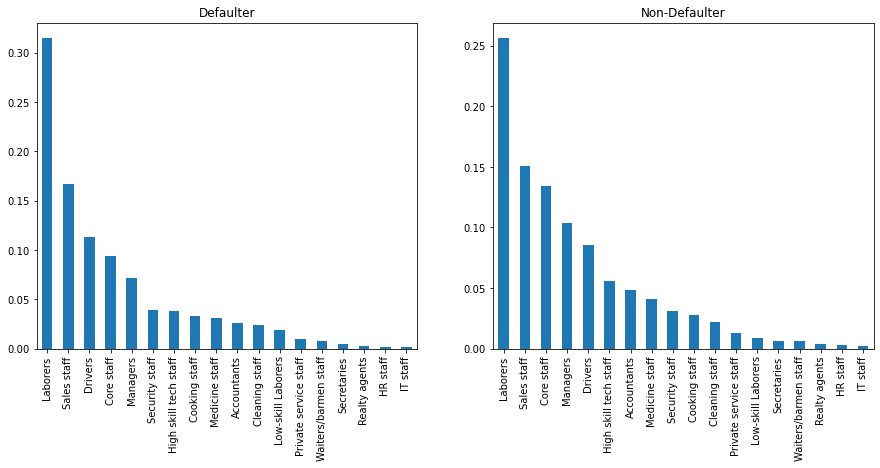

In [137]:
# OCCUPATION_TYPE

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The default percentage is highest among labourers, sales staff and drivers with all these exceeding 10%.
# The drivers have more rate of default than the non-default.
# IT staffs are most secured in terms of lending.
# There atre 18 types of occupation among both the defaulters as well as non-defaulters.

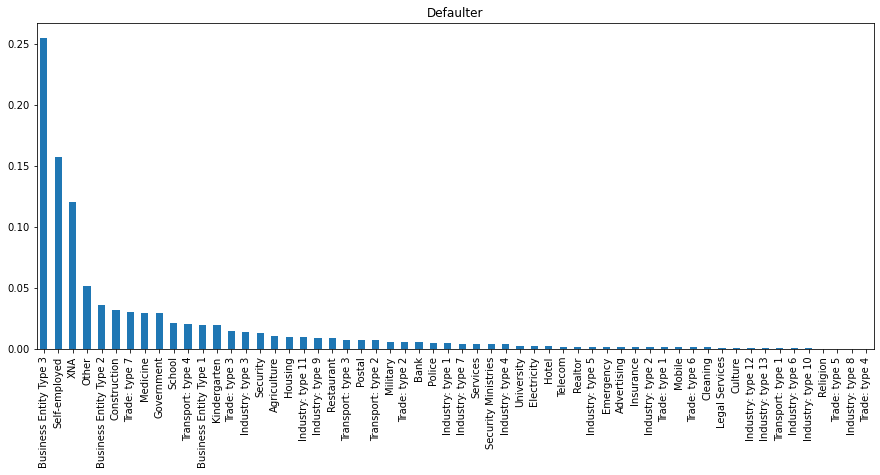

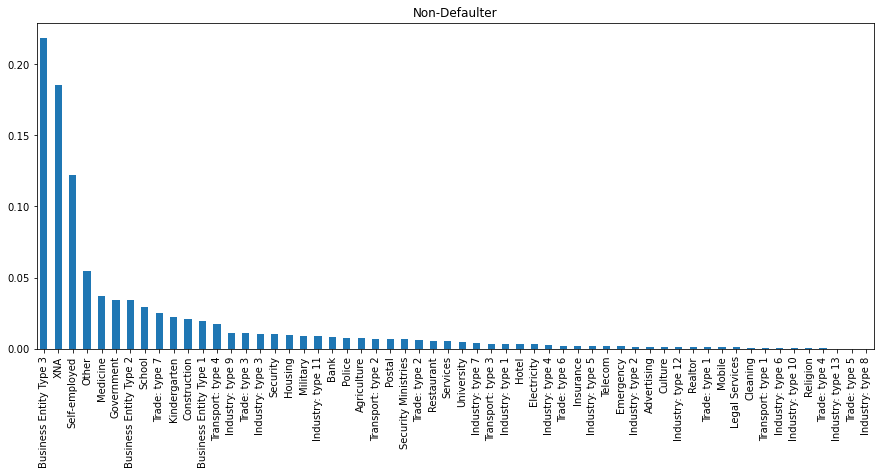

In [138]:
# ORGANIZATION_TYPE

plt.figure(figsize=(15,6))
plt.title('Defaulter')
df_d.ORGANIZATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()
plt.figure(figsize=(15,6))
plt.title('Non-Defaulter')
df_nd.ORGANIZATION_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The Business Entity Type 3 is top most category in both the defaulters and non-defaulters exceeding 20% in both of them.
# The self employed have more defaulting rate than non-defaulting.
# The top 3 categories in both the defaulters and non-defaulters are same but their sequence is different.

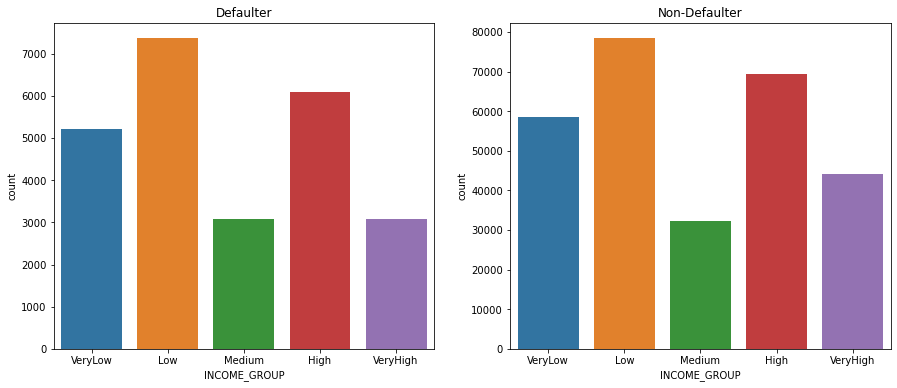

In [139]:
# INCOME_GROUP

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='INCOME_GROUP',data=df_d)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='INCOME_GROUP',data=df_nd)
plt.show()

In [ ]:
# The majority of loan applicants are from "low" income group.
# The medium income group seems to be most adverse to the concept of borrowing as their % is less in both defaulting and non-defaulting.

In [140]:
# Univariate analysis of Numerical/Continunous variable

In [141]:
# CNT_CHILDREN - Defaulters
df_d['CNT_CHILDREN'].value_counts()

0     16609
1      5454
2      2333
3       358
4        55
5         7
6         6
9         2
11        1
Name: CNT_CHILDREN, dtype: int64

In [142]:
# CNT_CHILDREN - Non-Defaulters
df_nd['CNT_CHILDREN'].value_counts()

0     198762
1      55665
2      24416
3       3359
4        374
5         77
6         15
7          7
14         3
8          2
12         2
10         2
19         2
Name: CNT_CHILDREN, dtype: int64

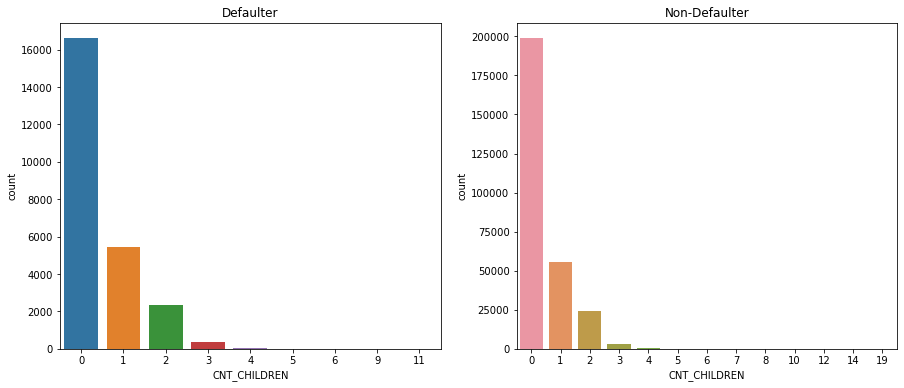

In [143]:
# CNT_CHILDREN

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='CNT_CHILDREN',data=df_d)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='CNT_CHILDREN',data=df_nd)
plt.show()

In [ ]:
# The no of children among defaulting and non-defaulting varies from 0-4 with the majorty in both the categories have no child.
# As both the defaulting and non-defaulting are leaned towards zero children, there can be non conclusive remarks on defaulters/ npn-defaulters based on number of children.

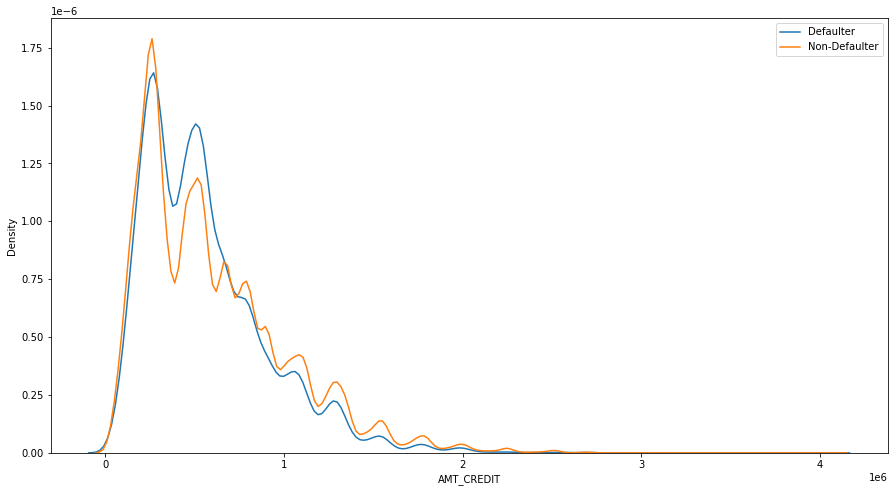

In [144]:
# AMT_CREDIT

plt.figure(figsize=(15,8))
sns.distplot(df_d['AMT_CREDIT'],hist=False,label='Defaulter')
sns.distplot(df_nd['AMT_CREDIT'],hist=False,label='Non-Defaulter')
plt.legend()
plt.show()

In [ ]:
# The Average amount credited is more for non defaulters than defaulters
# The minimum and maximum amount of loan credited are similar in both the cases

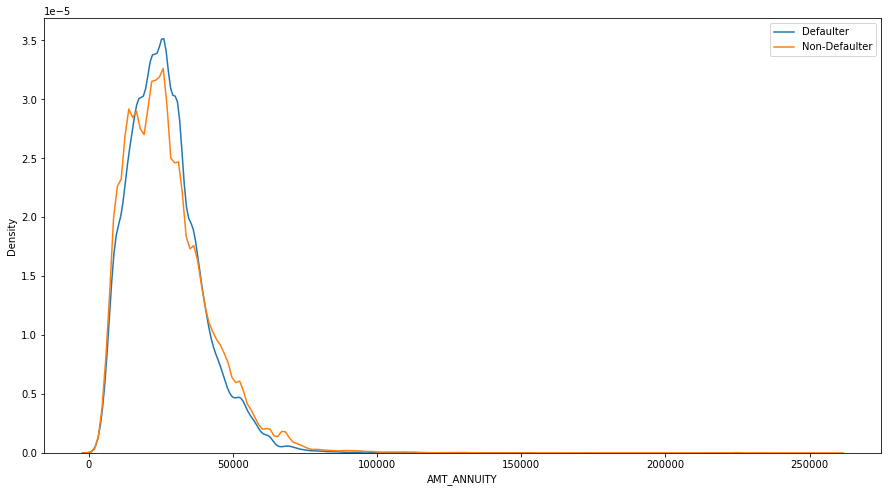

In [145]:
# AMT_ANNUITY

plt.figure(figsize=(15,8))
sns.distplot(df_d['AMT_ANNUITY'],hist=False,label='Defaulter')
sns.distplot(df_nd['AMT_ANNUITY'],hist=False,label='Non-Defaulter')
plt.legend()
plt.show()

In [ ]:
# The Average annuity amount is more for non defaulters
# Both the curves attain peak at similar annuity amount but defaulter has higher density. 

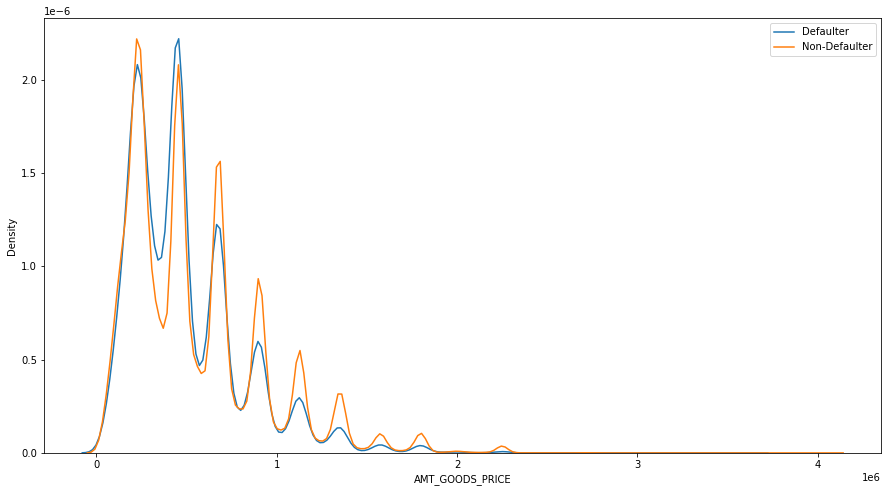

In [146]:
# AMT_GOODS_PRICE

plt.figure(figsize=(15,8))
sns.distplot(df_d['AMT_GOODS_PRICE'],hist=False,label='Defaulter')
sns.distplot(df_nd['AMT_GOODS_PRICE'],hist=False,label='Non-Defaulter')
plt.legend()
plt.show()

In [ ]:
# The Average goods price amount is more for non defaulters
# At most data points, the non-defaulters have higher value of density compared to defaulters

In [283]:
# FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL

In [148]:
# FLAG_MOBIL

In [149]:
df_d['FLAG_MOBIL'].value_counts(normalize=True)

1    1.0
Name: FLAG_MOBIL, dtype: float64

In [150]:
df_nd['FLAG_MOBIL'].value_counts(normalize=True)

1    0.999996
0    0.000004
Name: FLAG_MOBIL, dtype: float64

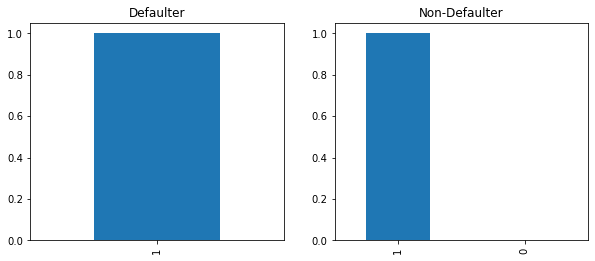

In [151]:
# FLAG_MOBIL

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.FLAG_MOBIL.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.FLAG_MOBIL.value_counts(normalize = True).plot.bar()
plt.show()


In [152]:
# FLAG_CONT_MOBILE

In [153]:
df_d['FLAG_CONT_MOBILE'].value_counts(normalize=True)

1    0.998187
0    0.001813
Name: FLAG_CONT_MOBILE, dtype: float64

In [154]:
df_nd['FLAG_CONT_MOBILE'].value_counts(normalize=True)

1    0.998129
0    0.001871
Name: FLAG_CONT_MOBILE, dtype: float64

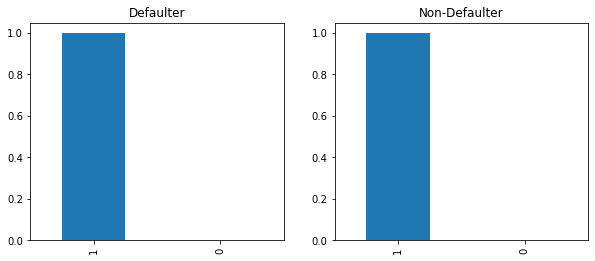

In [281]:
# FLAG_CONT_MOBILE

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.FLAG_CONT_MOBILE.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.FLAG_CONT_MOBILE.value_counts(normalize = True).plot.bar()
plt.show()


In [155]:
# There is no significant value difference observed between defaulters and non-defaulters on the basis of accessibility of mobile phones.

In [156]:
df_d['FLAG_EMAIL'].value_counts(normalize=True)

0    0.944653
1    0.055347
Name: FLAG_EMAIL, dtype: float64

In [157]:
df_nd['FLAG_EMAIL'].value_counts(normalize=True)

0    0.94316
1    0.05684
Name: FLAG_EMAIL, dtype: float64

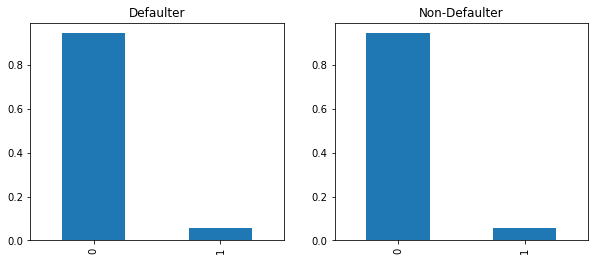

In [282]:
# FLAG_EMAIL

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.FLAG_EMAIL.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.FLAG_EMAIL.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The data reveals that more than 90% applicants in both the defaulter and non-defaulter did not provide the email id.

In [158]:
# CNT_FAM_MEMBERS - Defaulters
df_d['CNT_FAM_MEMBERS'].value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
10.0        1
13.0        1
11.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [159]:
# CNT_FAM_MEMBERS - Non-Defaulters
df_nd['CNT_FAM_MEMBERS'].value_counts()


2.0     146348
1.0      62172
3.0      47993
4.0      22561
5.0       3151
6.0        353
7.0         75
8.0         14
9.0          6
10.0         2
14.0         2
12.0         2
20.0         2
16.0         2
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

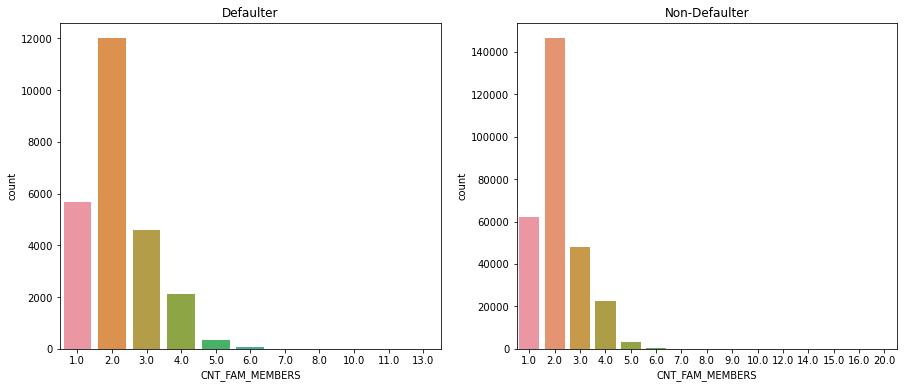

In [160]:
# CNT_FAM_MEMBERS

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='CNT_FAM_MEMBERS',data=df_d)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='CNT_FAM_MEMBERS',data=df_nd)
plt.show()

In [ ]:
# The count of family members is 2 for majority of the defaulting and non-defaulting loan applicants
# Count of family members greater than 5 is insignificant for both the categories
# The sequence of count of family is same for both the defaulting and non-defaulting categories

In [161]:
# REGION_RATING_CLIENT_W_CITY

In [162]:
df_d['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True)

2    0.731923
3    0.201450
1    0.066626
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [163]:
df_nd['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True)

2    0.747522
3    0.137463
1    0.115015
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

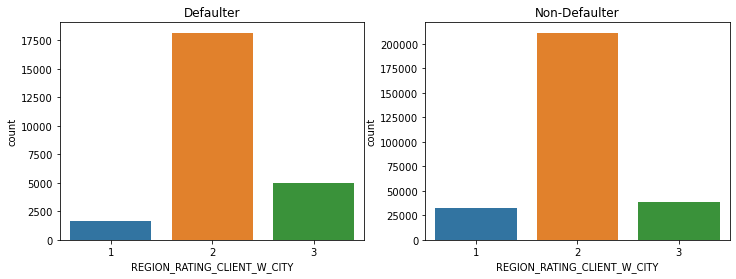

In [165]:
# REGION_RATING_CLIENT_W_CITY

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='REGION_RATING_CLIENT_W_CITY',data=df_d)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='REGION_RATING_CLIENT_W_CITY',data=df_nd)
plt.show()

In [ ]:
# Clients with Region rating = 1 are comparatively more likely to be non defaulters
# Clients with Region rating = 3 are comparatively more likely to be defaulters

In [166]:
# REG_REGION_NOT_LIVE_REGION

In [167]:
df_d['REG_REGION_NOT_LIVE_REGION'].value_counts(normalize=True)

0    0.982558
1    0.017442
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

In [168]:
df_nd['REG_REGION_NOT_LIVE_REGION'].value_counts(normalize=True)

0    0.985058
1    0.014942
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

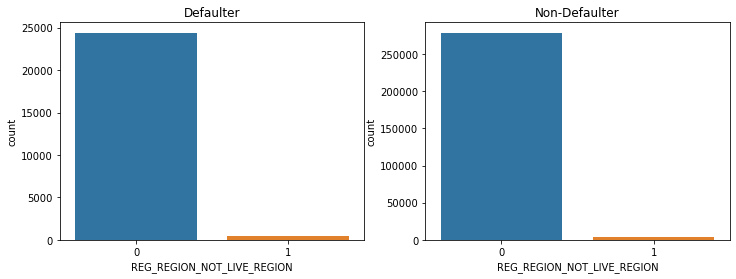

In [292]:
# REG_REGION_NOT_LIVE_REGION

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='REG_REGION_NOT_LIVE_REGION',data=df_d)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='REG_REGION_NOT_LIVE_REGION',data=df_nd)
plt.show()

In [ ]:
# There is no significant value difference observed in between defaulters and non-defaulters on the basis of their permanent address and contact address.

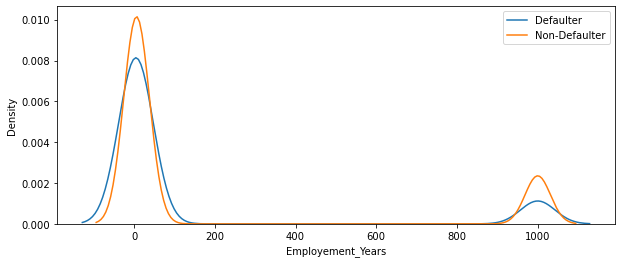

In [169]:
# Employement_Years

plt.figure(figsize=(10,4))
sns.distplot(df_d['Employement_Years'],hist=False,label='Defaulter')
sns.distplot(df_nd['Employement_Years'],hist=False,label='Non-Defaulter')
plt.legend()
plt.show()

In [ ]:
# The non defaulter clients have a greater number of years of employment than defaulters
# The Average value of number of years employed is more for non defaulters

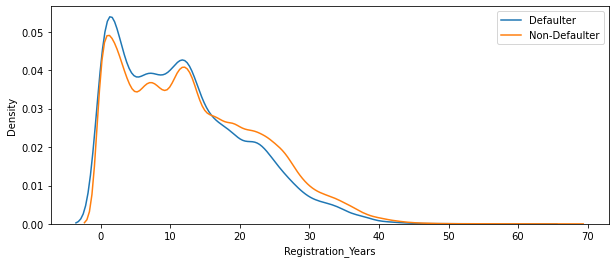

In [170]:
# Registration_Years

plt.figure(figsize=(10,4))
sns.distplot(df_d['Registration_Years'],hist=False,label='Defaulter')
sns.distplot(df_nd['Registration_Years'],hist=False,label='Non-Defaulter')
plt.legend()
plt.show()

In [ ]:
# The density for registration years for both defaulter and non-defaulters converge at zero for values greater than 40 years.
# The density for defaulters have higher value for 0-15 years
# The density for non defaulters have higher value for 15-40 years

In [171]:
# ID_Years - Defaulters
df_d.ID_Years.value_counts(normalize = True)

11    0.123666
12    0.095871
10    0.069970
2     0.069768
7     0.068157
6     0.066546
3     0.065700
4     0.063766
1     0.063323
0     0.062558
5     0.061309
8     0.060745
9     0.059174
13    0.047251
14    0.015750
15    0.004673
16    0.001732
17    0.000040
Name: ID_Years, dtype: float64

In [172]:
# ID_Years - Non-Defaulters
df_nd.ID_Years.value_counts(normalize = True)

11    0.145738
12    0.127647
10    0.069285
13    0.068585
9     0.062702
7     0.062065
8     0.060661
6     0.059359
5     0.055429
2     0.055379
3     0.054591
4     0.053073
1     0.050431
0     0.047240
14    0.018197
15    0.006633
16    0.002851
17    0.000131
19    0.000004
Name: ID_Years, dtype: float64

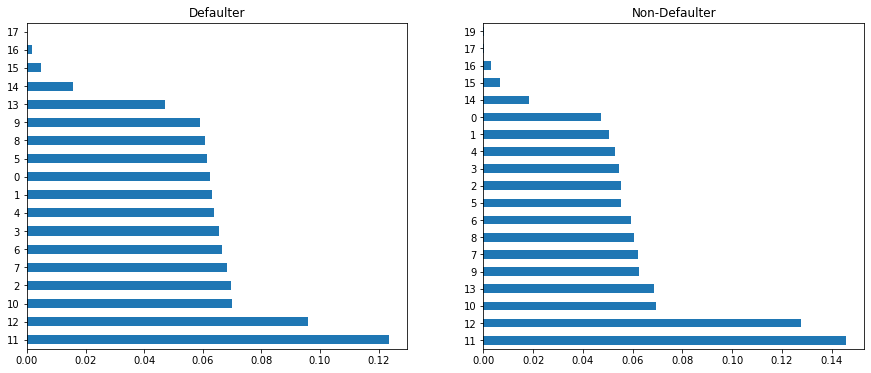

In [173]:
# ID_Years (X axis - value counts in %age, Y axis - ID_Years)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.ID_Years.value_counts(normalize = True).plot.barh()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.ID_Years.value_counts(normalize = True).plot.barh()
plt.show()

In [ ]:
# The Id years for 2-13 range is less than 6%.
# The maximum Id years is 11 for both the defaulting and non-defaulting years.

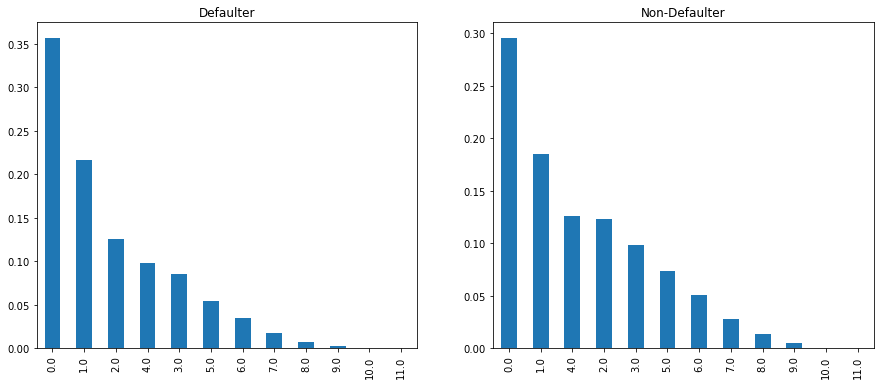

In [174]:
# YEARS_LAST_PHONE_CHANGE

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.YEARS_LAST_PHONE_CHANGE.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.YEARS_LAST_PHONE_CHANGE.value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
# The majority of defaulters and non defaulters have changed their phone within 1 year.
# Almost half of the applicants have changed their phone no in last 1 year for both the defaulting and non-defaulting categories.

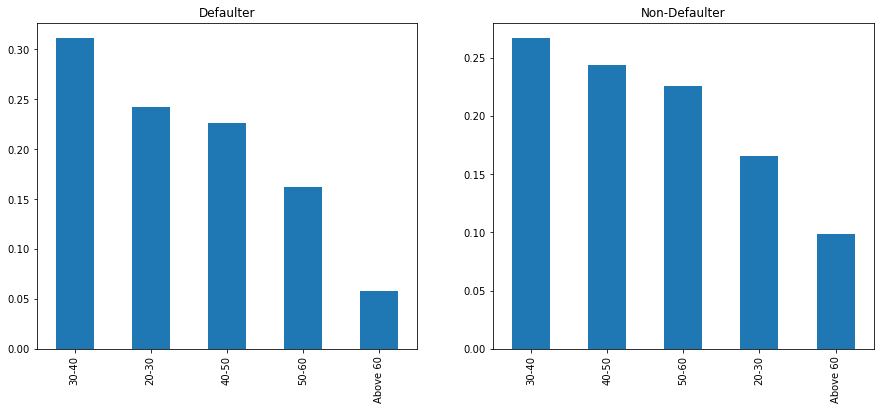

In [175]:
# AGE_GROUP

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_d.AGE_GROUP.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_nd.AGE_GROUP.value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
# The Age Group 30-40 consist of majority of loan applicants.
# The 20-30 age group applicants are more likely turn to be defaulters.
# The above 60 age group is the only category falling below 5% among defaulters.
# More than 50% of defaulter as well as non-defaulter comes from 2 age groups i.e. 30-40 and 20-30.

In [176]:
# Bivariate Analysis : Categorical vs Categorical

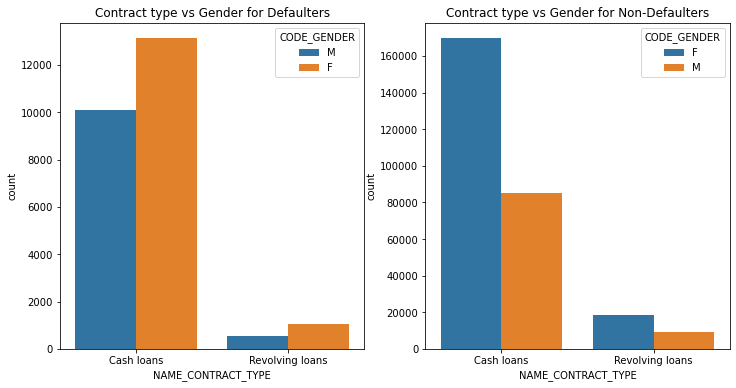

In [177]:
# NAME_CONTRACT_TYPE VS CODE_GENDER

plt.figure(figsize = [12,6])
plt.subplot(1,2,1)
sns.countplot(df_d.NAME_CONTRACT_TYPE, hue = df_d.CODE_GENDER)
plt.title('Contract type vs Gender for Defaulters')
plt.subplot(1,2,2)
sns.countplot(df_nd.NAME_CONTRACT_TYPE, hue = df_nd.CODE_GENDER)
plt.title('Contract type vs Gender for Non-Defaulters')
plt.show()

In [ ]:
# Cash loans consist of bulk of loans as per the data set.
# Females taking cash loans are more prone to default than males.
# The difference between males and females in cash loans in defaulting is more than non-defaulting categories.

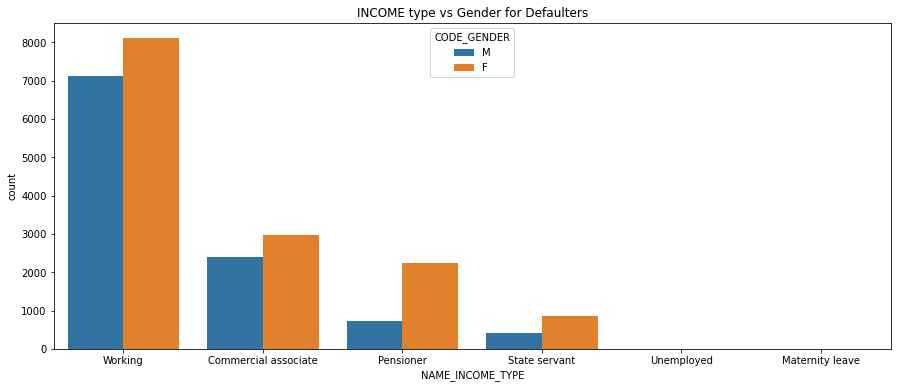

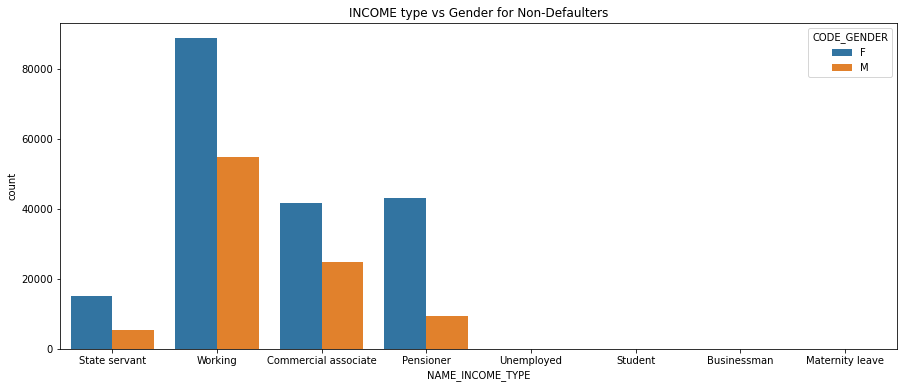

In [178]:
# NAME_INCOME_TYPE VS CODE_GENDER

plt.figure(figsize = [15,6])
sns.countplot(df_d.NAME_INCOME_TYPE, hue = df_d.CODE_GENDER)
plt.title('INCOME type vs Gender for Defaulters')
plt.show()
plt.figure(figsize = [15,6])
sns.countplot(df_nd.NAME_INCOME_TYPE, hue = df_nd.CODE_GENDER)
plt.title('INCOME type vs Gender for Non-Defaulters')
plt.show()

In [ ]:
# Working class is both major defaulter as well as non-defaulter
# Females in all income types categories are more likely to default than their male counterparts
# The unemployed and maternity leave contribution is insignificant in both the categories

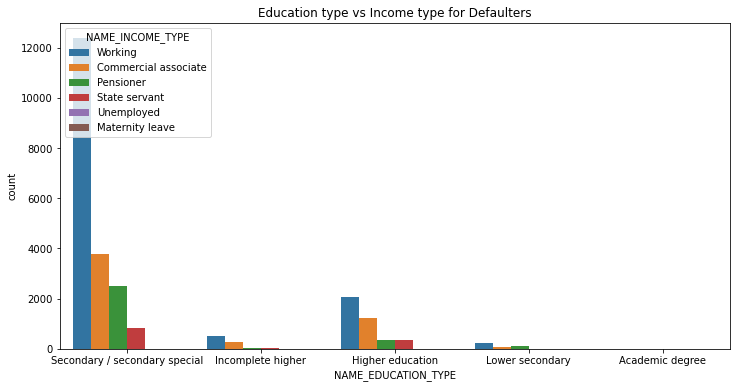

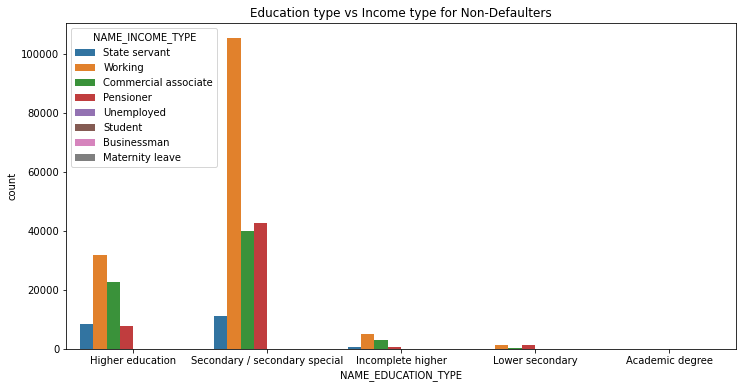

In [179]:
# NAME_EDUCATION_TYPE vs NAME_INCOME_TYPE

plt.figure(figsize = [12,6])
sns.countplot(df_d.NAME_EDUCATION_TYPE, hue = df_d.NAME_INCOME_TYPE)
plt.title('Education type vs Income type for Defaulters')
plt.show()
plt.figure(figsize = [12,6])
sns.countplot(df_nd.NAME_EDUCATION_TYPE, hue = df_nd.NAME_INCOME_TYPE)
plt.title('Education type vs Income type for Non-Defaulters')
plt.show()

In [ ]:
# Working applicants with secondary education are the majority in both the defaulter and non-defaulter categories.
# For defaulters the secondary education background is for working, commercial associates,pensioners and state servant.
# For non defaulters also, the secondary education background is for working, commercial associates,pensioners and state servant. though in a different order


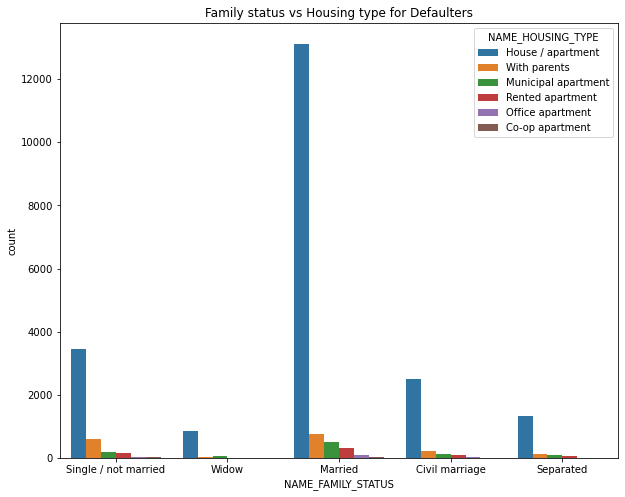

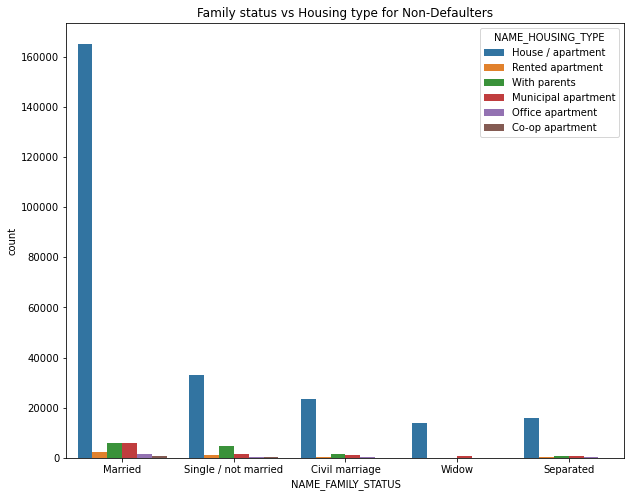

In [180]:
# NAME_FAMILY_STATUS vs NAME_HOUSING_TYPE

plt.figure(figsize = [10,8])
sns.countplot(df_d.NAME_FAMILY_STATUS, hue = df_d.NAME_HOUSING_TYPE)
plt.title('Family status vs Housing type for Defaulters')
plt.show()
plt.figure(figsize = [10,8])
sns.countplot(df_nd.NAME_FAMILY_STATUS, hue = df_nd.NAME_HOUSING_TYPE)
plt.title('Family status vs Housing type for Non-Defaulters')
plt.show()

In [ ]:
# In all sub categories of defaulters applicants living in apartments are in majority
# The married applicants living in apartments are more than the sum of all non-married applicants in the defaulters categories
# The defaulter and non-defaulters follow same pattern in family status and housing type 

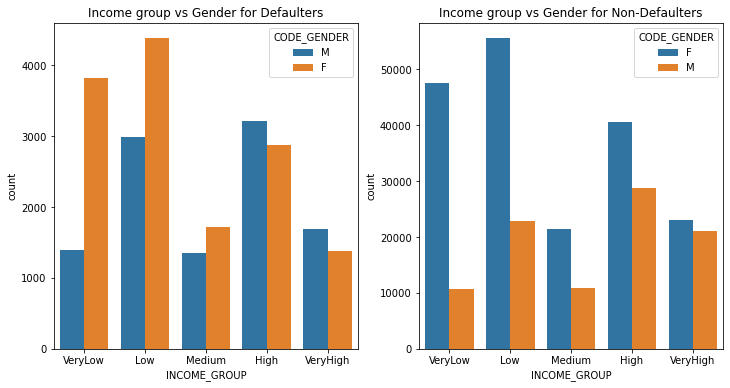

In [181]:
# INCOME_GROUP vs CODE_GENDER

plt.figure(figsize = [12,6])
plt.subplot(1,2,1)
sns.countplot(df_d.INCOME_GROUP, hue = df_d.CODE_GENDER)
plt.title('Income group vs Gender for Defaulters')
plt.subplot(1,2,2)
sns.countplot(df_nd.INCOME_GROUP, hue = df_nd.CODE_GENDER)
plt.title('Income group vs Gender for Non-Defaulters')
plt.show()

In [ ]:
# For defaulters among very low, low and medium categories females have higher proportion than the males
# For defaulters among High and Very high categories females have lower proportion than the males
# For all income groups females are better places compared to males in the non-defaulter category
# For very low income group the difference between males and females is highest in the non defaulting category

In [182]:
# Bivariate analysis : Categorical vs Numerical

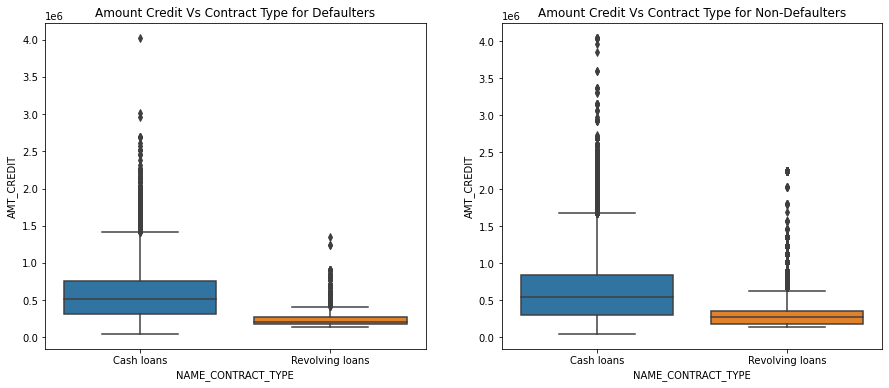

In [183]:
# NAME_CONTRACT_TYPE vs AMT_CREDIT

plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
sns.boxplot(df_d.NAME_CONTRACT_TYPE,df_d.AMT_CREDIT)
plt.title('Amount Credit Vs Contract Type for Defaulters')
plt.subplot(1,2,2)
sns.boxplot(df_nd.NAME_CONTRACT_TYPE,df_nd.AMT_CREDIT)
plt.title('Amount Credit Vs Contract Type for Non-Defaulters')
plt.show()

In [ ]:
# The amount credited is higher for cash loans in both the defaulting and non defaulting category
# The bulk of the cash loans for defaulter is less than 1
# The cash loans proportion is higher for non defaulters than defaulters as far as amount credit is concerned

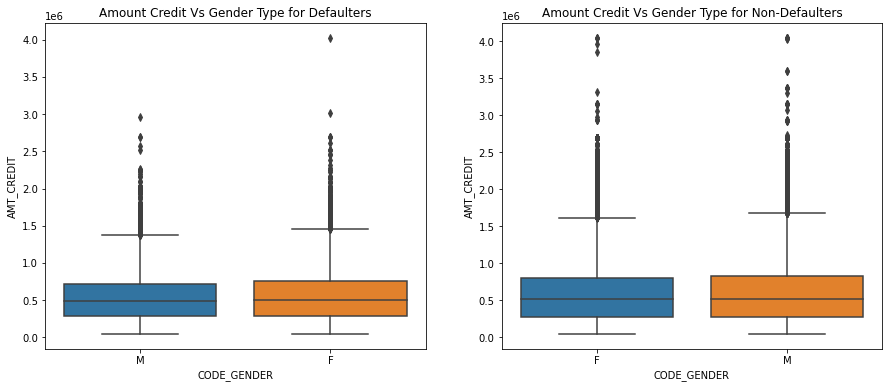

In [184]:
# CODE_GENDER vs AMT_CREDIT

plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
sns.boxplot(df_d.CODE_GENDER,df_d.AMT_CREDIT)
plt.title('Amount Credit Vs Gender Type for Defaulters')
plt.subplot(1,2,2)
sns.boxplot(df_nd.CODE_GENDER,df_nd.AMT_CREDIT)
plt.title('Amount Credit Vs Gender Type for Non-Defaulters')
plt.show()

In [ ]:
# The amount credited for male and female in both defaulting and non-defaulting categories are almost same for majority of applications
# The amount credited for both the males and females for non defaulting category is higher than defaulting category  

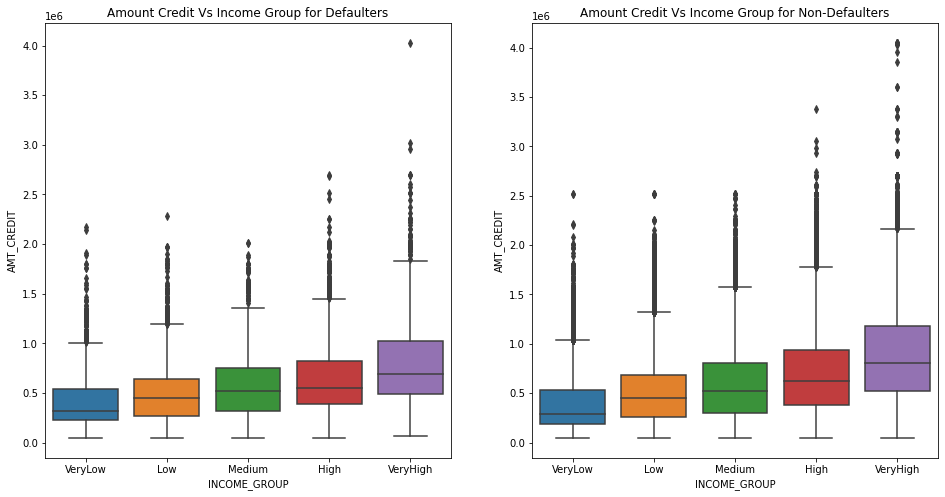

In [185]:
# INCOME_GROUP vs AMT_CREDIT

plt.figure(figsize = [16,8])
plt.subplot(1,2,1)
sns.boxplot(df_d.INCOME_GROUP,df_d.AMT_CREDIT)
plt.title('Amount Credit Vs Income Group for Defaulters')
plt.subplot(1,2,2)
sns.boxplot(df_nd.INCOME_GROUP,df_nd.AMT_CREDIT)
plt.title('Amount Credit Vs Income Group for Non-Defaulters')
plt.show()

In [ ]:
# The amount credit for both the defaulters and non defaulters follow the same pattern with Very low income group at bottom and very high at the top.
# The non defaulter category has almost continuous coverage  for very high income group till the maximum amount.

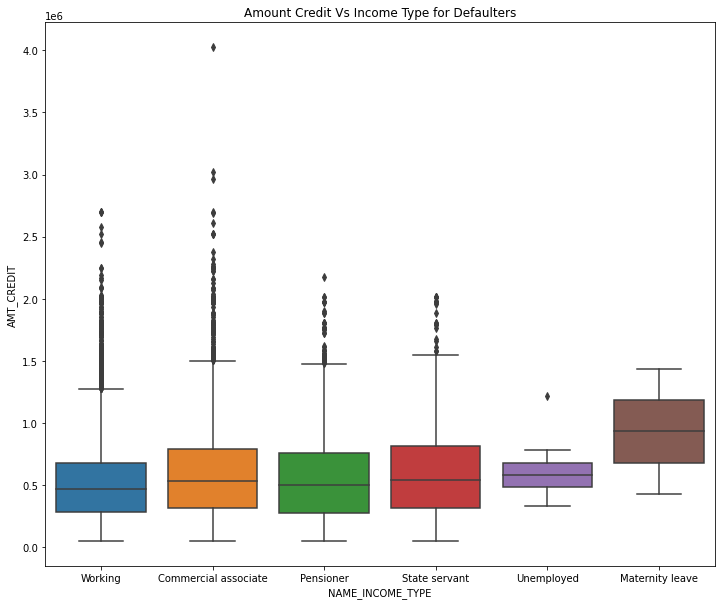

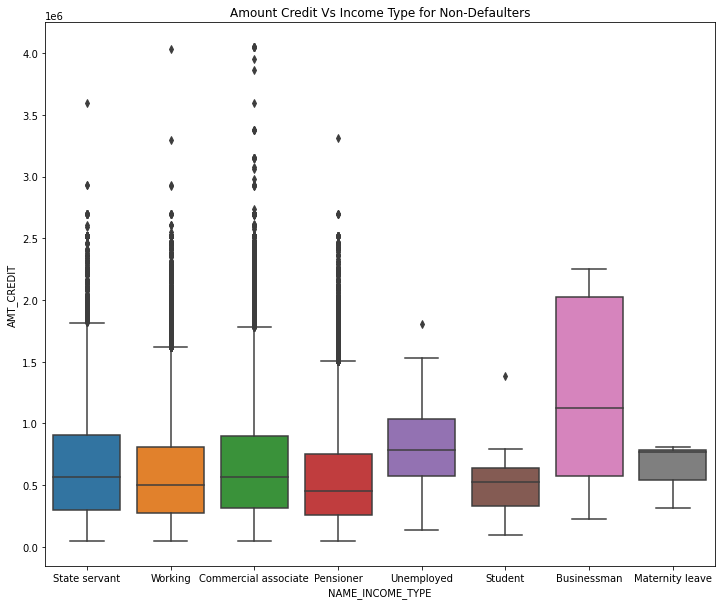

In [186]:
# NAME_INCOME_TYPE vs AMT_CREDIT
 
plt.figure(figsize = [12,10])
sns.boxplot(df_d.NAME_INCOME_TYPE,df_d.AMT_CREDIT)
plt.title('Amount Credit Vs Income Type for Defaulters')
plt.show()
plt.figure(figsize = [12,10])
sns.boxplot(df_nd.NAME_INCOME_TYPE,df_nd.AMT_CREDIT)
plt.title('Amount Credit Vs Income Type for Non-Defaulters')
plt.show()

In [ ]:
# The income type for non-deafulters have more sub categories including the student and businessman which are not significant for defaulters
# The maternity leaves category has higher default though the amount credit is lower than other segments
# The data reveals that businessman are less prone to default compared to other categories though the amount credit for them is not the highest


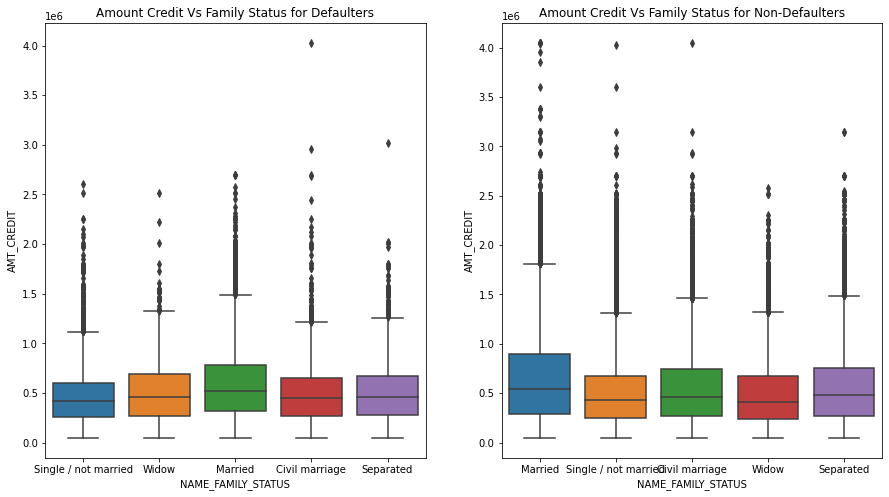

In [187]:
# NAME_FAMILY_STATUS vs AMT_CREDIT
 
plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
sns.boxplot(df_d.NAME_FAMILY_STATUS,df_d.AMT_CREDIT)
plt.title('Amount Credit Vs Family Status for Defaulters')
plt.subplot(1,2,2)
sns.boxplot(df_nd.NAME_FAMILY_STATUS,df_nd.AMT_CREDIT)
plt.title('Amount Credit Vs Family Status for Non-Defaulters')
plt.show()

In [ ]:
# The defaulting proportion of married applicants is higher along with the average amount credit
# The amount credit is highest for civil marriage in both the defaulting and non defaulting category
# The sub categories covered in both the defaulting and non defaulting are same 

In [188]:
# Bivariate analysis: Numerical Vs Numerical

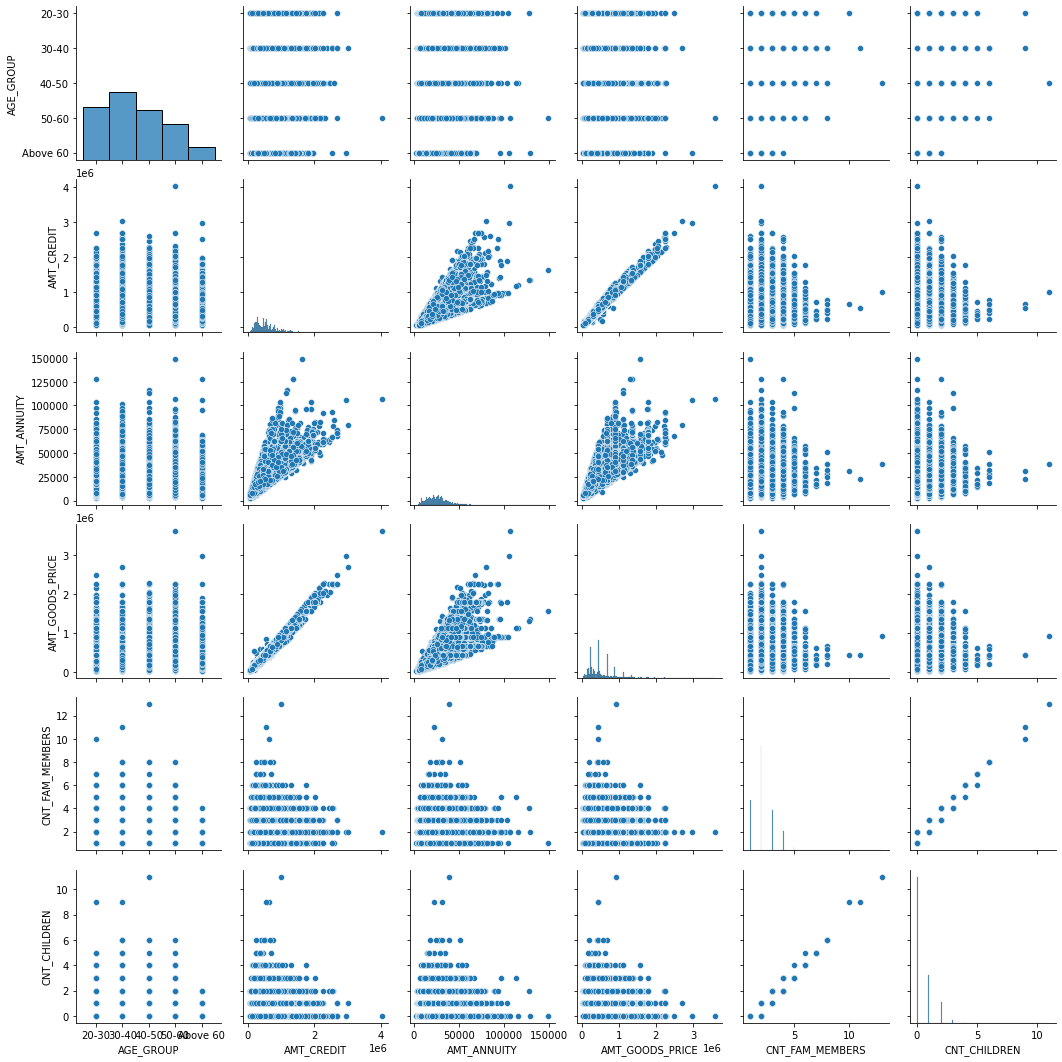

In [189]:
sns.pairplot(data = df_d, vars = ['AGE_GROUP','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS', 'CNT_CHILDREN'])
plt.show()

In [191]:
# Multivariate analysis: 

In [192]:
# Show the correlation matrix for defaulters.
df_d[['AGE_GROUP','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'Employement_Years','Registration_Years','ID_Years','YEARS_LAST_PHONE_CHANGE']].corr()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,CNT_CHILDREN,Employement_Years,Registration_Years,ID_Years,YEARS_LAST_PHONE_CHANGE
AMT_CREDIT,1.000000,0.752195,0.983103,0.051224,-0.001675,0.001936,0.025949,0.052010,0.117117
AMT_ANNUITY,0.752195,1.000000,0.752699,0.075711,0.031257,-0.081213,-0.034047,0.016624,0.081911
AMT_GOODS_PRICE,0.983103,0.752699,1.000000,0.047388,-0.008112,0.006644,0.025834,0.055899,0.123883
CNT_FAM_MEMBERS,0.051224,0.075711,0.047388,1.000000,0.885484,-0.186516,-0.145576,0.031652,0.012709
CNT_CHILDREN,-0.001675,0.031257,-0.008112,0.885484,1.000000,-0.192866,-0.149029,0.031792,-0.011222
Employement_Years,0.001936,-0.081213,0.006644,-0.186516,-0.192866,1.000000,0.192537,0.229150,0.004767
Registration_Years,0.025949,-0.034047,0.025834,-0.145576,-0.149029,0.192537,1.000000,0.096846,0.075953
ID_Years,0.052010,0.016624,0.055899,0.031652,0.031792,0.229150,0.096846,1.000000,0.131512
YEARS_LAST_PHONE_CHANGE,0.117117,0.081911,0.123883,0.012709,-0.011222,0.004767,0.075953,0.131512,1.000000


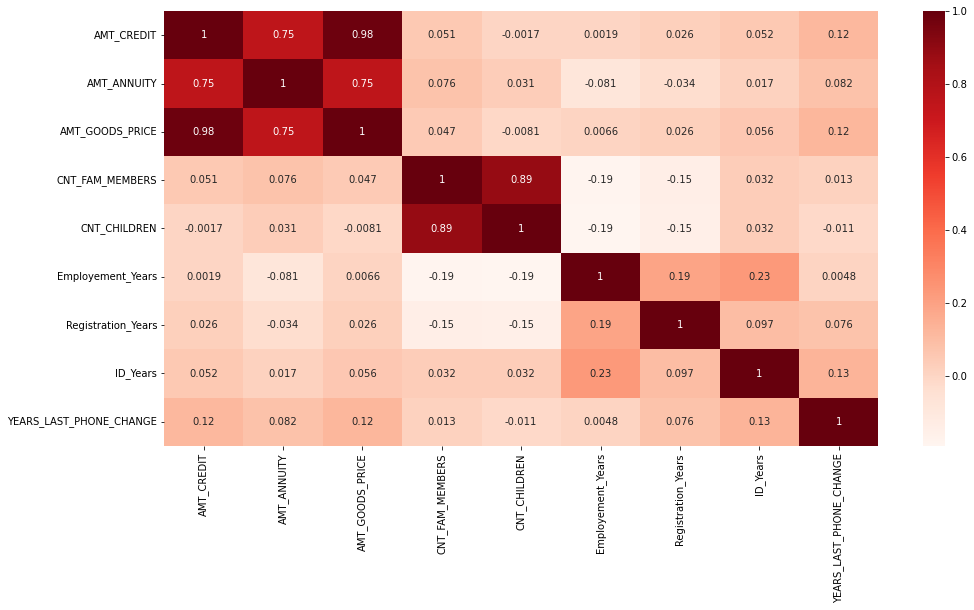

In [193]:
# Plot the correlation matrix for defaulters (Heatmap)
plt.figure(figsize = [16,8])
sns.heatmap(df_d[['AGE_GROUP','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'Employement_Years','Registration_Years','ID_Years','YEARS_LAST_PHONE_CHANGE']].corr(),annot = True, cmap = 'Reds')
plt.show()

In [ ]:
# The amount credit shows very high correlation with the amount_good price for defaulters which is expected.
# The amount credit and no of employments years have no significant correlation for defaulters
# The amount of annuity is correlated with amount credit for defaulters
# The count of children are highly correlated with count of family members for defaulters which is inline with the expectation
# The count of children have negative correlation with the employment years for defaulters
# The count of children has low correlation with most of the factors for defaulters
# The registration years has low correlation with most of the factors for defaulters
# The Id-years has low correlation with the employment years for defaulters

In [194]:
# Show the correlation matrix for non-defaulters.
df_nd[['AGE_GROUP','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'Employement_Years','Registration_Years','ID_Years','YEARS_LAST_PHONE_CHANGE']].corr()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,CNT_CHILDREN,Employement_Years,Registration_Years,ID_Years,YEARS_LAST_PHONE_CHANGE
AMT_CREDIT,1.000000,0.771309,0.987250,0.064536,0.003081,-0.070105,-0.013375,0.001778,0.072697
AMT_ANNUITY,0.771309,1.000000,0.776686,0.075787,0.020905,-0.104983,-0.039304,-0.013916,0.063098
AMT_GOODS_PRICE,0.987250,0.776686,1.000000,0.062814,-0.000525,-0.068609,-0.015830,0.003983,0.073979
CNT_FAM_MEMBERS,0.064536,0.075787,0.062814,1.000000,0.878571,-0.238301,-0.175702,0.020442,0.027819
CNT_CHILDREN,0.003081,0.020905,-0.000525,0.878571,1.000000,-0.245173,-0.185818,0.028867,0.007724
Employement_Years,-0.070105,-0.104983,-0.068609,-0.238301,-0.245173,1.000000,0.214525,0.276254,-0.020674
Registration_Years,-0.013375,-0.039304,-0.015830,-0.175702,-0.185818,0.214525,1.000000,0.099681,0.055187
ID_Years,0.001778,-0.013916,0.003983,0.020442,0.028867,0.276254,0.099681,1.000000,0.087370
YEARS_LAST_PHONE_CHANGE,0.072697,0.063098,0.073979,0.027819,0.007724,-0.020674,0.055187,0.087370,1.000000


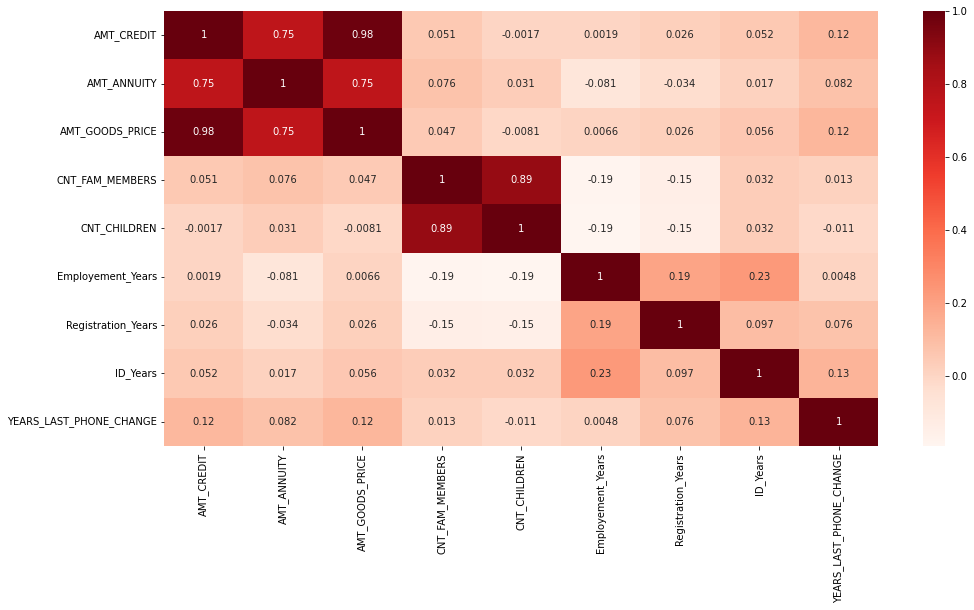

In [195]:
# Plot the correlation matrix for non-defaulters.
plt.figure(figsize = [16,8])
sns.heatmap(df_d[['AGE_GROUP','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'Employement_Years','Registration_Years','ID_Years','YEARS_LAST_PHONE_CHANGE']].corr(),annot = True, cmap = 'Reds')
plt.show()

In [ ]:
# The amount credit shows very high correlation with the amount_good price for non defaulters.
# The amount credit and no of employments years have no significant correlation for non defaulters
# The amount of annuity is correlated with amount credit for non defaulters
# The count of children are highly correlated with count of family members for non defaulters 
# The count of children have negative correlation with the employment years for non defaulters
# The count of children has low correlation with most of the factors for non defaulters
# The registration years has low correlation with most of the factors for non defaulters
# The Id-years has low correlation with the employment years for non defaulters

In [196]:
pre_app = pd.read_csv('previous_application.csv')
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
pre_app.shape

(1670214, 37)

In [198]:
list(pre_app.columns)

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [199]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [200]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [201]:
pre_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [202]:
columns_with_nan1 = pre_app.columns[pre_app.isnull().any()].tolist()
columns_with_nan1

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [203]:
len(columns_with_nan1)

16

In [204]:
null_perc1 = pre_app.isnull().sum()/len(pre_app)*100
null_perc1.sort_values(ascending = False).head(30)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_YIELD_GROUP              0.000000
NAME_PORTFOLIO                0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
NAME_PRODUCT_TYPE             0.000000
SK_ID_PREV                    0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_CLIENT_TYPE              0.000000
CODE_REJECT_REASON       

In [205]:
# Columns have more than 40% null values have been dropped
pre_app.drop(columns = ['AMT_CREDIT','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis=1, inplace = True)

In [206]:
pre_app.shape

(1670214, 25)

In [207]:
null_perc = pre_app.isnull().sum()/len(pre_app)*100
null_perc.sort_values(ascending = False).head(20)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
dtype: float64

In [208]:
pre_app.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [209]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [210]:
pre_app['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

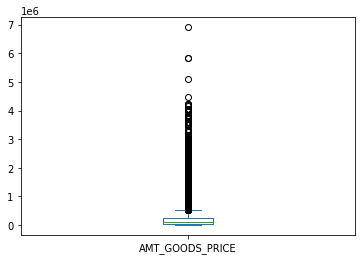

In [211]:
pre_app['AMT_GOODS_PRICE'].plot(kind = 'box')
plt.show()

In [ ]:
# 

In [212]:
pre_app['AMT_GOODS_PRICE'].quantile([0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 1.0])

0.25      50841.0
0.50     112320.0
0.75     234000.0
0.80     315000.0
0.85     450000.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

In [213]:
# AMT_GOODS_PRICE has high number of null values so we should impute these values with median value of this column. 
# AMT_GOODS_PRICE has high number of outliers we should cap the outliers at 85th percentile as most of the values are close to this data point. 

In [214]:
pre_app['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

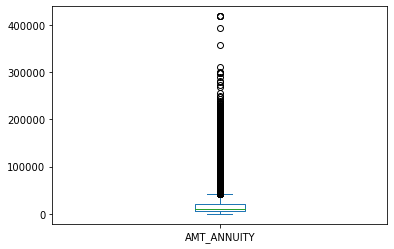

In [215]:
pre_app['AMT_ANNUITY'].plot(kind = 'box')
plt.show()

In [216]:
pre_app['AMT_ANNUITY'].quantile([0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 1.0])

0.25      6321.7800
0.50     11250.0000
0.75     20658.4200
0.80     23638.5000
0.85     27896.9805
0.90     34703.8200
0.95     45336.7800
0.99     69685.7886
1.00    418058.1450
Name: AMT_ANNUITY, dtype: float64

In [217]:
# AMT_ANNUITY has high number of null values so we should impute these values with median value of this column. 
# AMT_ANNUITY has high number of outliers so we should cap the outliers at 90th percentile as most of the values are close to this datapoint.

In [218]:
pre_app['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

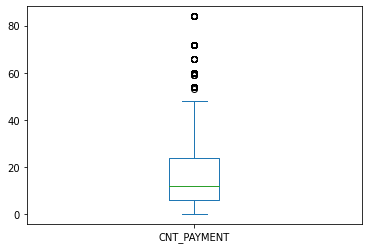

In [219]:
pre_app['CNT_PAYMENT'].plot(kind = 'box')
plt.show()

In [220]:
pre_app['CNT_PAYMENT'].quantile([0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 1.0])

0.25     6.0
0.50    12.0
0.75    24.0
0.80    24.0
0.85    30.0
0.90    36.0
0.95    48.0
0.99    60.0
1.00    84.0
Name: CNT_PAYMENT, dtype: float64

In [221]:
# CNT_PAYMENT has high number of null values so we should impute these values with median value of this column. 
# CNT_PAYMENT has outliers so we should cap the outliers at 95th percentile as most of the values are close to this datapoint (which lies around upper whisker).

In [222]:
print (pre_app['PRODUCT_COMBINATION'].dtypes)

object


In [223]:
pre_app['PRODUCT_COMBINATION'].value_counts(normalize=True)

Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

In [224]:
# Null values of the categorical column PRODUCT_COMBINATION should be imputed with mode of this column i.e. 'cash'.

In [225]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [226]:
# Dropping of few less important columns for further analysis.
pre_app.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY',
              'DAYS_DECISION', 'CODE_REJECT_REASON', 'SELLERPLACE_AREA', 'NAME_YIELD_GROUP',
              'PRODUCT_COMBINATION'],axis=1, inplace=True)

In [227]:
pre_app.shape

(1670214, 17)

In [228]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Y,XAP,Approved,Cash through the bank,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0
1,2802425,108129,Cash loans,25188.615,607500.0,607500.0,Y,XNA,Approved,XNA,Repeater,XNA,Cash,x-sell,Contact center,XNA,36.0
2,2523466,122040,Cash loans,15060.735,112500.0,112500.0,Y,XNA,Approved,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0
3,2819243,176158,Cash loans,47041.335,450000.0,450000.0,Y,XNA,Approved,Cash through the bank,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0
4,1784265,202054,Cash loans,31924.395,337500.0,337500.0,Y,Repairs,Refused,Cash through the bank,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,24.0


In [229]:
# We will perform left merge of pre_app with app_data as we will analyse the clients data in the app_data.
app_merge = pd.merge(app_data, pre_app, how ='left', on = 'SK_ID_CURR')
app_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,Employement_Years,Registration_Years,ID_Years,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,Laborers,1.0,2,0,Business Entity Type 3,1,9.0,5,3.0,20-30,High,1038818.0,Consumer loans,9251.775,179055.0,179055.0,Y,XAP,Approved,XNA,New,Vehicles,POS,XNA,Stone,Auto technology,24.0
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1,1,0,Core staff,2.0,1,0,School,3,3.0,0,2.0,40-50,VeryHigh,1810518.0,Cash loans,98356.995,900000.0,900000.0,Y,XNA,Approved,XNA,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0
2,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1,1,0,Core staff,2.0,1,0,School,3,3.0,0,2.0,40-50,VeryHigh,2636178.0,Consumer loans,64567.665,337500.0,337500.0,Y,XAP,Approved,Cash through the bank,Refreshed,Furniture,POS,XNA,Stone,Furniture,6.0
3,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1,1,0,Core staff,2.0,1,0,School,3,3.0,0,2.0,40-50,VeryHigh,2396755.0,Consumer loans,6737.310,68809.5,68809.5,Y,XAP,Approved,Cash through the bank,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,12.0
4,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,Laborers,1.0,2,0,Government,0,11.0,6,2.0,50-60,VeryLow,1564014.0,Consumer loans,5357.250,24282.0,24282.0,Y,XAP,Approved,Cash through the bank,New,Mobile,POS,XNA,Regional / Local,Connectivity,4.0


In [230]:
app_merge.shape

(1430155, 44)

In [231]:
app_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 44 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  object  
 3   CODE_GENDER                  1430155 non-null  object  
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  object  
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_CREDIT                   1430155 non-null  float64 
 8   AMT_ANNUITY_x                1430062 non-null  float64 
 9   AMT_GOODS_PRICE_x            1428936 non-null  float64 
 10  NAME_INCOME_TYPE             1430155 non-null  object  
 11  NAME_EDUCATION_TYPE          1430155 non-null  object  
 12  NAME_FAMILY_STATUS          

In [232]:
# df_merge_d : Defaulters
# df_merge_nd : Non-Defaulters
df_merge_d = app_merge[app_merge['TARGET']==1] 
df_merge_nd = app_merge[app_merge['TARGET']==0]

In [233]:
# Univariate Analysis of Categorical columns

In [234]:
pre_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_GOODS_PRICE', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT'],
      dtype='object')

In [235]:
app_merge.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_CREDIT',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE', 'Employement_Years',
       'Registration_Years', 'ID_Years', 'YEARS_LAST_PHONE_CHANGE',
       'AGE_GROUP', 'INCOME_GROUP', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT'],
      dtype='object')

In [236]:
df_merge_d.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True)

XAP                                 0.532551
XNA                                 0.404201
Repairs                             0.021380
Other                               0.013673
Urgent needs                        0.008843
Building a house or an annex        0.002648
Buying a used car                   0.002599
Payments on other loans             0.002059
Medicine                            0.002051
Everyday expenses                   0.001765
Education                           0.001144
Car repairs                         0.001038
Purchase of electronic equipment    0.000956
Journey                             0.000907
Wedding / gift / holiday            0.000768
Furniture                           0.000695
Buying a home                       0.000686
Buying a new car                    0.000654
Buying a holiday home / land        0.000449
Business development                0.000376
Gasification / water supply         0.000368
Hobby                               0.000074
Buying a g

In [237]:
df_merge_nd.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True)

XAP                                 0.558934
XNA                                 0.401051
Repairs                             0.013553
Other                               0.009106
Urgent needs                        0.004766
Buying a used car                   0.001666
Building a house or an annex        0.001564
Everyday expenses                   0.001422
Medicine                            0.001255
Payments on other loans             0.001023
Education                           0.000925
Journey                             0.000721
Purchase of electronic equipment    0.000633
Buying a new car                    0.000624
Wedding / gift / holiday            0.000547
Buying a home                       0.000478
Furniture                           0.000445
Car repairs                         0.000437
Buying a holiday home / land        0.000316
Business development                0.000242
Gasification / water supply         0.000160
Buying a garage                     0.000084
Hobby     

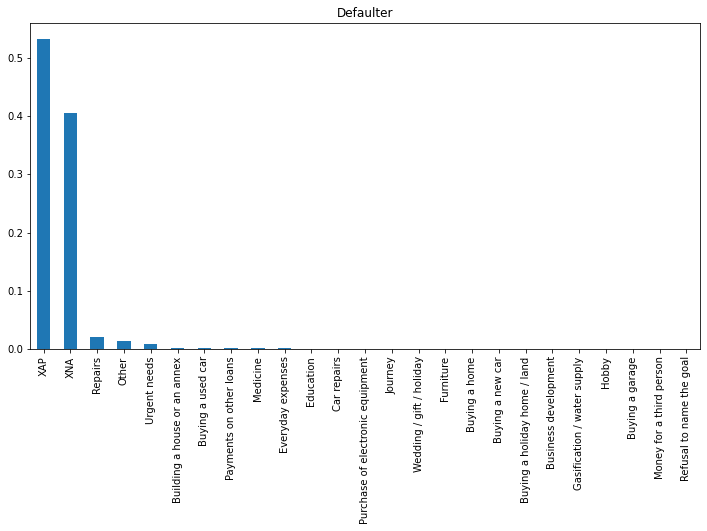

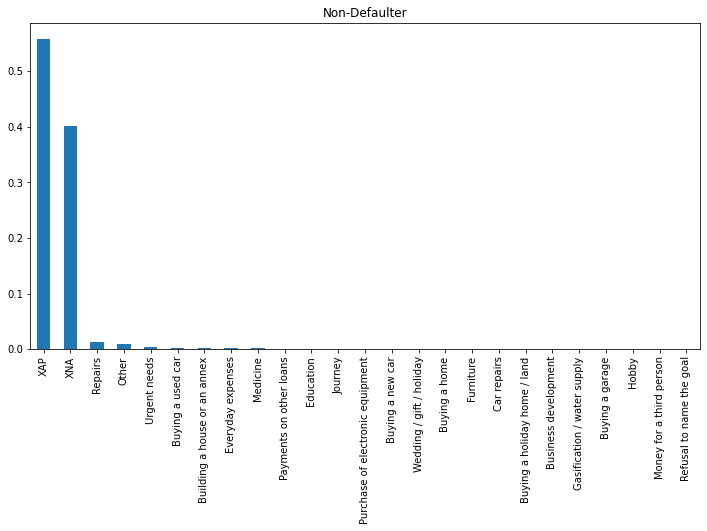

In [238]:
# NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=(12,6))
plt.title('Defaulter')
df_merge_d.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True).plot.bar()
plt.show()
plt.figure(figsize=(12,6))
plt.title('Non-Defaulter')
df_merge_nd.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The XAP and XNA are majority in both the defaulter as well as non defaulter segment
# The repairs is the 3rd largest segment in both the defaulter and non defaulter segment
# There are 25 categories of cash loan purpose for both the defauter and non defaulter group

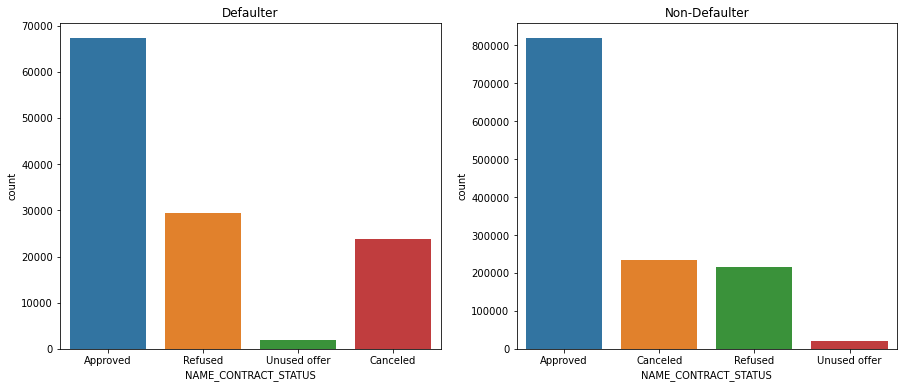

In [240]:
# NAME_CONTRACT_STATUS

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(x='NAME_CONTRACT_STATUS',data=df_merge_d)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(x='NAME_CONTRACT_STATUS',data=df_merge_nd)
plt.show()

In [ ]:
# The approved remains the highest rank category in both the defaulting and non-defaulting segment.
# The Refused is 2nd ranked category after Approved in defaulting segment but 3rd ranked for non-defaulting segments.

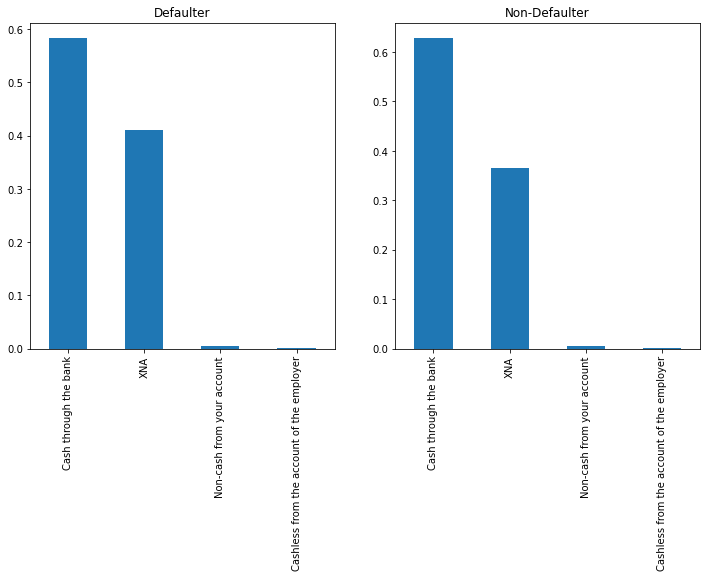

In [241]:
# NAME_PAYMENT_TYPE

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_merge_d.NAME_PAYMENT_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_merge_nd.NAME_PAYMENT_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The cash through the bank is the highest contributor for both the defaulting and non defaulting category
# The XNA is the 2nd largest category for both the segments
# The rest other categories contribute insignificantly to both the segments

In [243]:
# Check the unique values of the column
df_merge_d.NAME_CLIENT_TYPE.unique()

array(['New', nan, 'Repeater', 'Refreshed', 'XNA'], dtype=object)

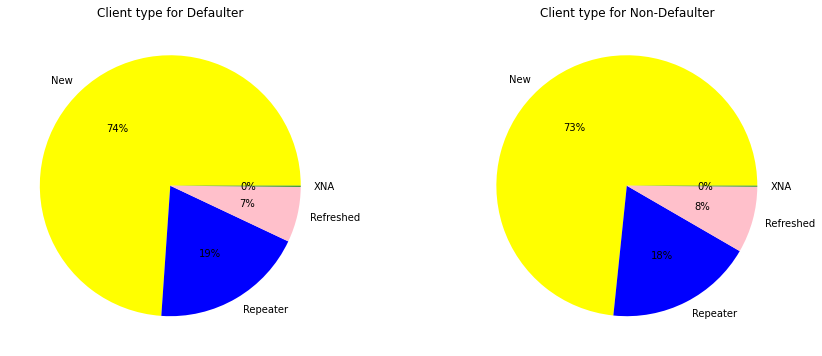

In [244]:
# NAME_CLIENT_TYPE

colors = ('yellow','blue','pink', 'green')
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
plt.pie(df_merge_d.NAME_CLIENT_TYPE.value_counts(), labels = ['New','Repeater', 'Refreshed', 'XNA'],colors = colors,autopct='%1.0f%%')
plt.title('Client type for Defaulter')
plt.subplot(1,2,2)
plt.pie(df_merge_nd.NAME_CLIENT_TYPE.value_counts(), labels = ['New','Repeater', 'Refreshed', 'XNA'],colors = colors,autopct='%1.0f%%')
plt.title('Client type for Non-Defaulter')
plt.show()

In [ ]:
# The client type for both the defaulting and non defaulting segment follow same pattern
# 1/5th of the applicants in both defaulting and non defaulting segment are repeaters
# 3/4th of the applicants in both defaulting and non defaulting segment are new

In [245]:
# Check the unique values of the column
df_merge_d.NAME_GOODS_CATEGORY.unique()

array(['Vehicles', nan, 'XNA', 'Photo / Cinema Equipment', 'Mobile',
       'Audio/Video', 'Computers', 'Construction Materials',
       'Consumer Electronics', 'Clothing and Accessories', 'Furniture',
       'Office Appliances', 'Gardening', 'Auto Accessories', 'Homewares',
       'Medicine', 'Medical Supplies', 'Sport and Leisure', 'Other',
       'Jewelry', 'Education', 'Tourism', 'Additional Service', 'Fitness',
       'Insurance', 'Direct Sales', 'Weapon'], dtype=object)

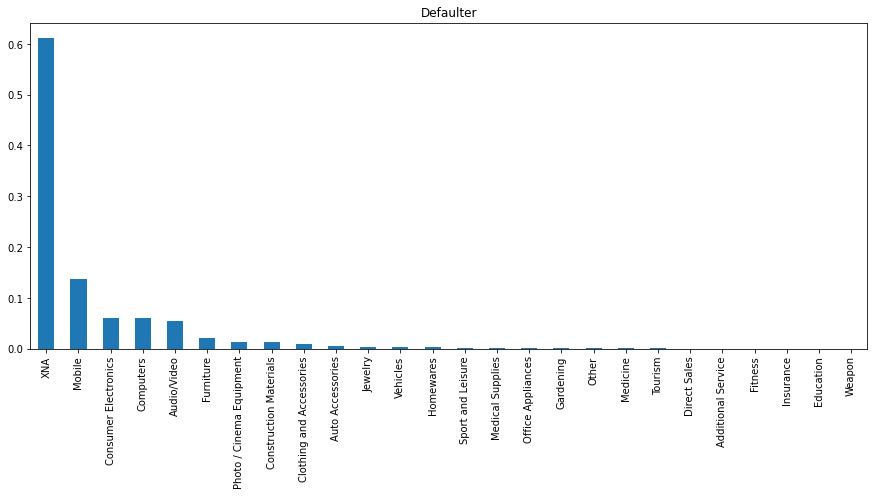

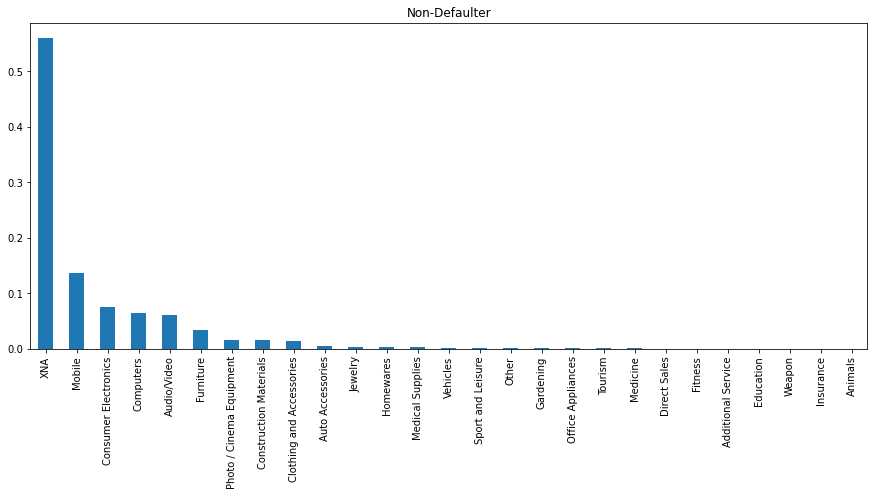

In [246]:
# NAME_GOODS_CATEGORY

plt.figure(figsize=(15,6))
plt.title('Defaulter')
df_merge_d.NAME_GOODS_CATEGORY.value_counts(normalize = True).plot.bar()
plt.show()
plt.figure(figsize=(15,6))
plt.title('Non-Defaulter')
df_merge_nd.NAME_GOODS_CATEGORY.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# Apart from XNA, the mobile and electronics items cover the major portion in both the defaulting and non defaulting segment
# There are more than 25 categories in both the defaulting and non defaulting segment in the Goods category

In [247]:
# NAME_PORTFOLIO
df_merge_d.NAME_PORTFOLIO.unique()

array(['POS', nan, 'Cards', 'Cash', 'XNA', 'Cars'], dtype=object)

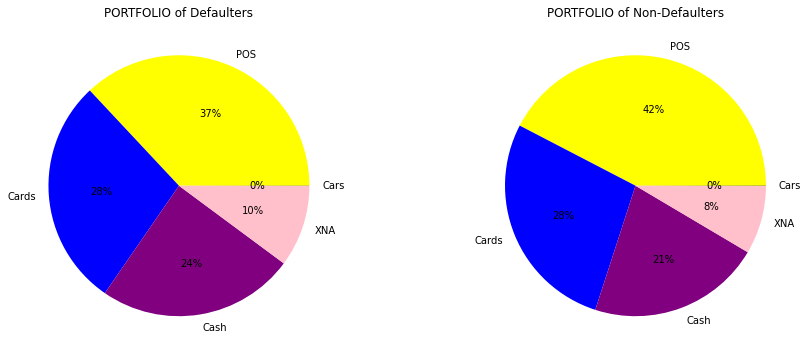

In [248]:
# NAME_PORTFOLIO

colors = ('yellow','blue','purple', 'pink','black')
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
plt.pie(df_merge_d.NAME_PORTFOLIO.value_counts(), labels = ['POS','Cards', 'Cash', 'XNA', 'Cars'],colors = colors,autopct='%1.0f%%')
plt.title('PORTFOLIO of Defaulters')
plt.subplot(1,2,2)
plt.pie(df_merge_nd.NAME_PORTFOLIO.value_counts(), labels = ['POS','Cards', 'Cash', 'XNA', 'Cars'],colors = colors,autopct='%1.0f%%')
plt.title('PORTFOLIO of Non-Defaulters')
plt.show()

In [ ]:
# The POS, Cards and Cash remain the top 3 categories with cumulative contribution of around 90% for both the segments-defaulting and non-defaulting.
# The POS is better compared to cards and cash in terms of repayment as it has higher % of non-defaulters.

In [249]:
# NAME_PRODUCT_TYPE
df_merge_d.NAME_PRODUCT_TYPE.unique()

array(['XNA', nan, 'x-sell', 'walk-in'], dtype=object)

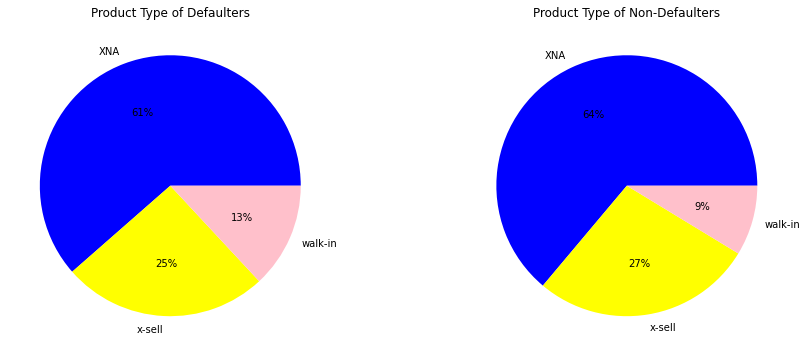

In [250]:
# NAME_PRODUCT_TYPE

colors = ('blue','yellow','pink')
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
plt.pie(df_merge_d.NAME_PRODUCT_TYPE.value_counts(), labels = ['XNA', 'x-sell', 'walk-in'],colors = colors,autopct='%1.0f%%')
plt.title('Product Type of Defaulters')
plt.subplot(1,2,2)
plt.pie(df_merge_nd.NAME_PRODUCT_TYPE.value_counts(), labels = ['XNA', 'x-sell', 'walk-in'],colors = colors,autopct='%1.0f%%')
plt.title('Product Type of Non-Defaulters')
plt.show()

In [ ]:
# The product types of defaulters and non defaulters follow the same pattern
# 1/4th of the defaulters and non defaulters are x-sell
# The propriton of defaulters in walk-in is higher compared to non defaulters

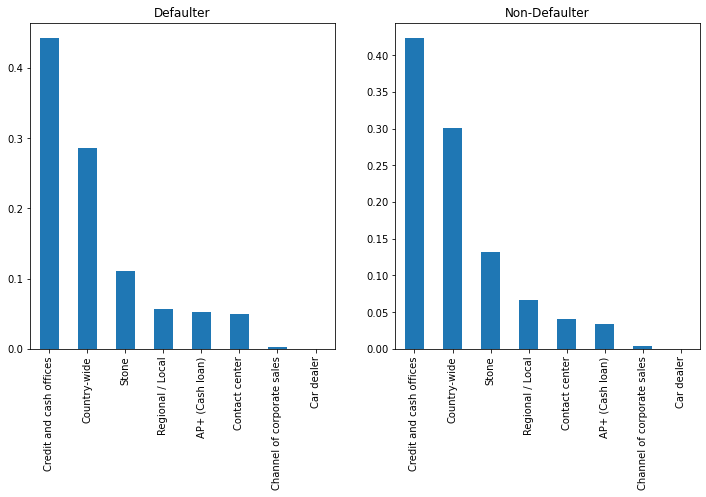

In [251]:
# CHANNEL_TYPE

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_merge_d.CHANNEL_TYPE.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_merge_nd.CHANNEL_TYPE.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# The Credit and cash offices, country wise and store remains the top 3 categories for both the defaulting and non-defaulting segments.
# Both the defaulters and non defaulters have same 8 categories with the similar contribution from each of the categories

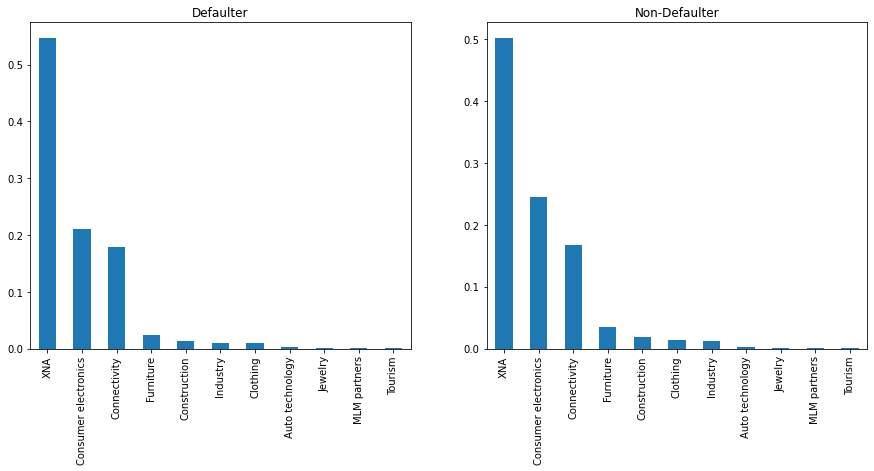

In [252]:
# NAME_SELLER_INDUSTRY

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_merge_d.NAME_SELLER_INDUSTRY.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_merge_nd.NAME_SELLER_INDUSTRY.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
# Almost 50% of the products have industry as XNA in both the defaulting and non defaulting segments
# The top 3 categories XNA, consumer electronics and connectivity are major contributor for both the defaulting and non defaulting segments

In [253]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 17 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_GOODS_PRICE              1284699 non-null  float64
 6   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 7   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 8   NAME_CONTRACT_STATUS         1670214 non-null  object 
 9   NAME_PAYMENT_TYPE            1670214 non-null  object 
 10  NAME_CLIENT_TYPE             1670214 non-null  object 
 11  NAME_GOODS_CATEGORY          1670214 non-null  object 
 12  NAME_PORTFOLIO               1670214 non-n

In [254]:
app_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 44 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  object  
 3   CODE_GENDER                  1430155 non-null  object  
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  object  
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_CREDIT                   1430155 non-null  float64 
 8   AMT_ANNUITY_x                1430062 non-null  float64 
 9   AMT_GOODS_PRICE_x            1428936 non-null  float64 
 10  NAME_INCOME_TYPE             1430155 non-null  object  
 11  NAME_EDUCATION_TYPE          1430155 non-null  object  
 12  NAME_FAMILY_STATUS          

In [255]:
# Univariate Analysis of Continuous/Numerical columns

In [266]:
df_merge_d.AMT_APPLICATION.describe()

count    1.223600e+05
mean     1.699184e+05
std      2.862924e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.655500e+04
75%      1.800000e+05
max      3.982500e+06
Name: AMT_APPLICATION, dtype: float64

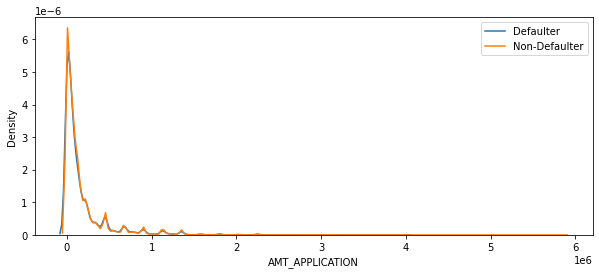

In [268]:
# AMT_APPLICATION

plt.figure(figsize=(10,4))
sns.distplot(df_merge_d['AMT_APPLICATION'],hist=False,label='Defaulter')
sns.distplot(df_merge_nd['AMT_APPLICATION'],hist=False,label='Non-Defaulter')
plt.legend()
plt.show()

In [ ]:
# The density is highest for lower amount of loan application for no defaulters
# The density is almost zero for amount application greater than 1

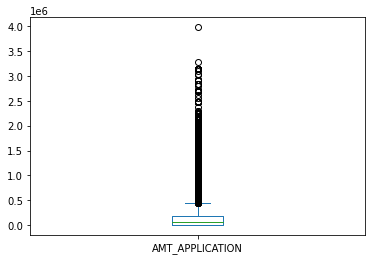

In [269]:
df_merge_d['AMT_APPLICATION'].plot(kind = 'box')
plt.show()

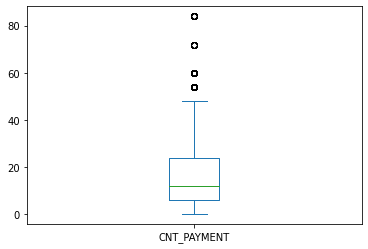

In [294]:
# CNT_PAYMENT

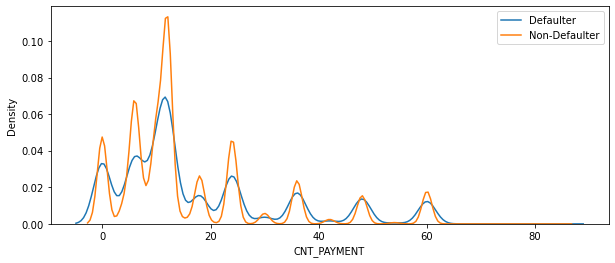

In [296]:
# CNT_PAYMENT

plt.figure(figsize=(10,4))
sns.distplot(df_merge_d['CNT_PAYMENT'],hist=False,label='Defaulter')
sns.distplot(df_merge_nd['CNT_PAYMENT'],hist=False,label='Non-Defaulter')
plt.legend()
plt.show()

In [ ]:
# The density is higher for non defaulter than defaulter type of clients in terms of control payments

In [272]:
# Bivariate Analysis of Categorical vs Categorical columns

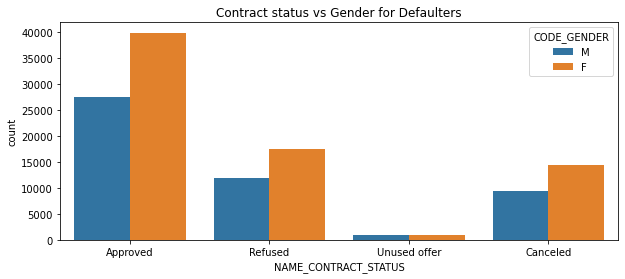

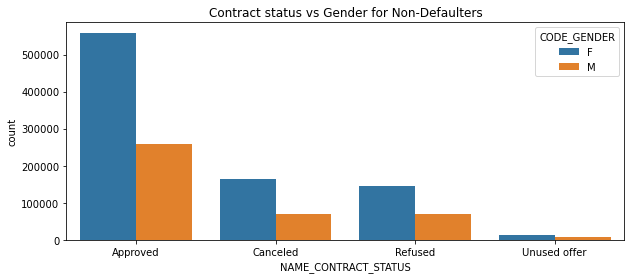

In [298]:
# CODE_GENDER vs NAME_CONTRACT_STATUS 

plt.figure(figsize = [10,4])
sns.countplot(df_merge_d.NAME_CONTRACT_STATUS, hue = df_merge_d.CODE_GENDER)
plt.title('Contract status vs Gender for Defaulters')
plt.show()
plt.figure(figsize = [10,4])
sns.countplot(df_merge_nd.NAME_CONTRACT_STATUS, hue = df_merge_nd.CODE_GENDER)
plt.title('Contract status vs Gender for Non-Defaulters')
plt.show()

In [ ]:
# Number of females clients for both defaulter and non-defaulter categories are high in all four types of contract status.

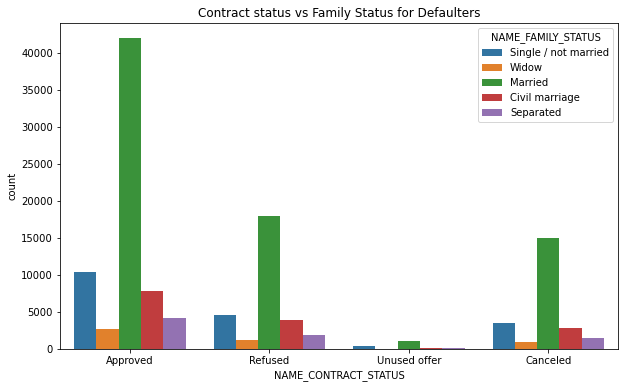

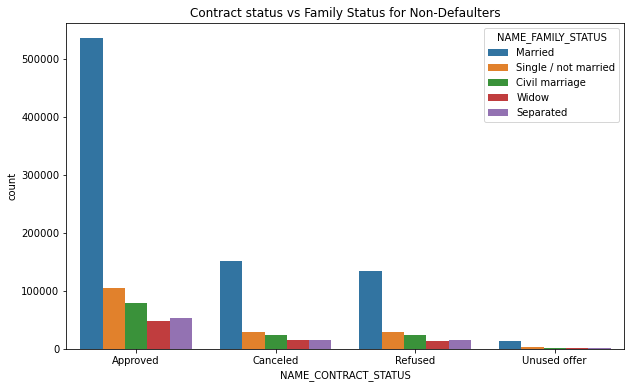

In [301]:
# NAME_FAMILY_STATUS vs NAME_CONTRACT_STATUS

plt.figure(figsize = [10,6])
sns.countplot(df_merge_d.NAME_CONTRACT_STATUS, hue = df_merge_d.NAME_FAMILY_STATUS)
plt.title('Contract status vs Family Status for Defaulters')
plt.show()
plt.figure(figsize = [10,6])
sns.countplot(df_merge_nd.NAME_CONTRACT_STATUS, hue = df_merge_nd.NAME_FAMILY_STATUS)
plt.title('Contract status vs Family Status for Non-Defaulters')
plt.show()

In [ ]:
# Number of married category of clients for case of both defaulters and non-defaulters are highest in all four types of contract status.
# Number of single/not married category of clients for case of both defaulters and non-defaulters are highest in all four types of contract status.


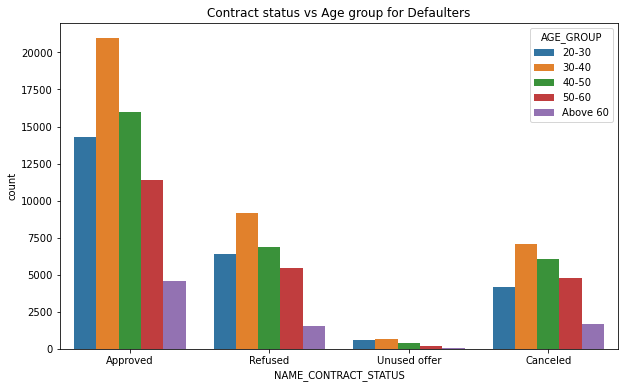

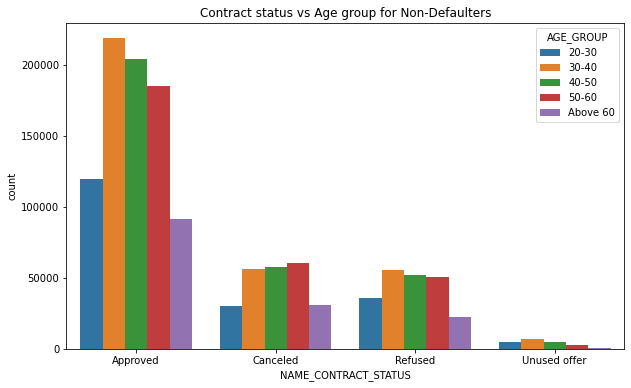

In [311]:
# NAME_CONTRACT_STATUS vs AGE_GROUP 

plt.figure(figsize = [10,6])
sns.countplot(df_merge_d.NAME_CONTRACT_STATUS, hue = df_merge_d.AGE_GROUP)
plt.title('Contract status vs Age group for Defaulters')
plt.show()
plt.figure(figsize = [10,6])
sns.countplot(df_merge_nd.NAME_CONTRACT_STATUS, hue = df_merge_nd.AGE_GROUP)
plt.title('Contract status vs Age group for Non-Defaulters')
plt.show()

In [ ]:
# Defaulter clients having 30-40 age group are maximum in all types of contract status. Almost similar trend has observed in case of non defaulter type of clients.

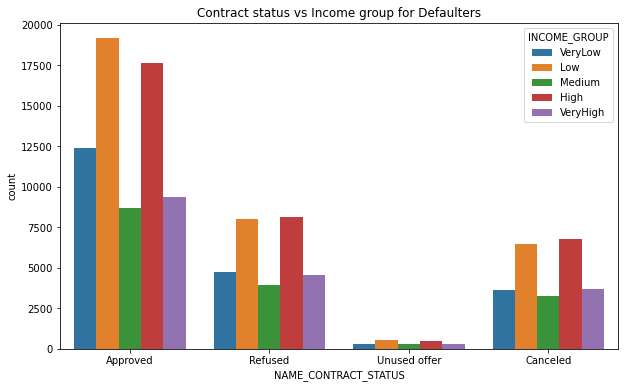

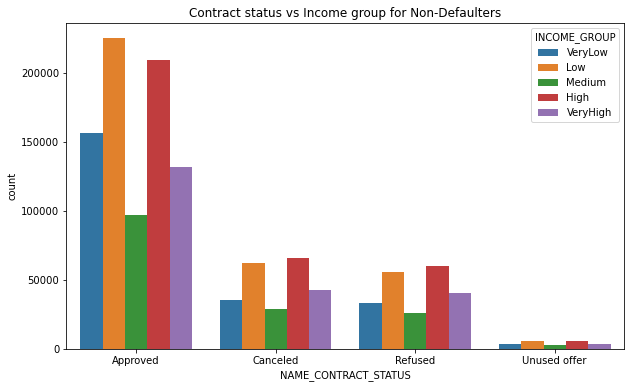

In [312]:
# NAME_CONTRACT_STATUS vs INCOME_GROUP 

plt.figure(figsize = [10,6])
sns.countplot(df_merge_d.NAME_CONTRACT_STATUS, hue = df_merge_d.INCOME_GROUP)
plt.title('Contract status vs Income group for Defaulters')
plt.show()
plt.figure(figsize = [10,6])
sns.countplot(df_merge_nd.NAME_CONTRACT_STATUS, hue = df_merge_nd.INCOME_GROUP)
plt.title('Contract status vs Income group for Non-Defaulters')
plt.show()

In [ ]:
# Low income group clients are maximum in number in case of approved category for both the defaulters and non-defaulters followed by high income category clients.

In [273]:
# Bivariate Analysis of Categorical vs Numerical columns

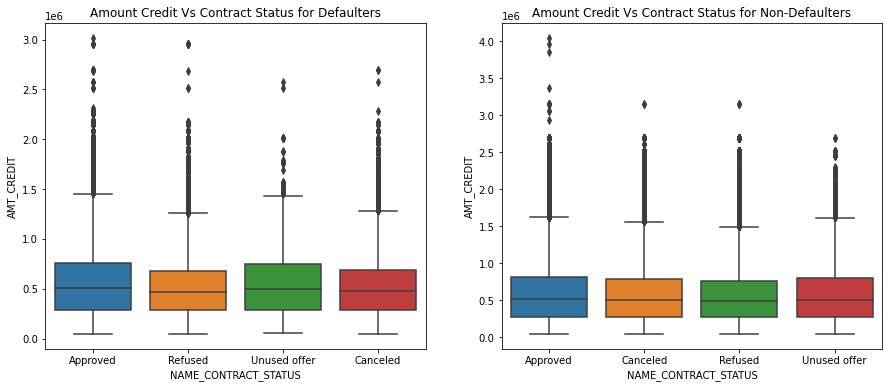

In [302]:
# AMT_CREDIT vs NAME_CONTRACT_STATUS 

plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
sns.boxplot(df_merge_d.NAME_CONTRACT_STATUS,df_merge_d.AMT_CREDIT)
plt.title('Amount Credit Vs Contract Status for Defaulters')
plt.subplot(1,2,2)
sns.boxplot(df_merge_nd.NAME_CONTRACT_STATUS,df_merge_nd.AMT_CREDIT)
plt.title('Amount Credit Vs Contract Status for Non-Defaulters')
plt.show()


In [ ]:
# Amount credited in case of approved category of clients has high number of outliers for both defaulters and non defaulters.
# Median values of the credited amount are almost similar for all category of defaulter and non defaulter clients .
 

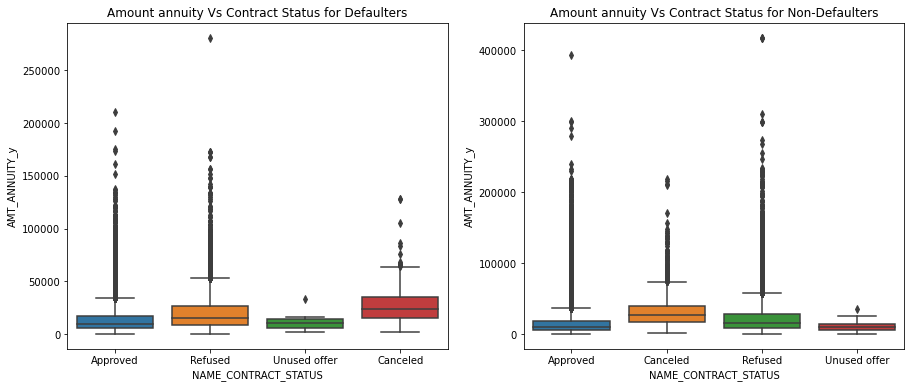

In [306]:
# AMT_ANNUITY_y vs NAME_CONTRACT_STATUS

plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
sns.boxplot(df_merge_d.NAME_CONTRACT_STATUS,df_merge_d.AMT_ANNUITY_y)
plt.title('Amount annuity Vs Contract Status for Defaulters')
plt.subplot(1,2,2)
sns.boxplot(df_merge_nd.NAME_CONTRACT_STATUS,df_merge_nd.AMT_ANNUITY_y)
plt.title('Amount annuity Vs Contract Status for Non-Defaulters')
plt.show()

In [ ]:
# Annuity amount in case of refused and approved category of clients has high number of outliers for both the defaulters and non defaulters.
# Annuity amount is highest in case of cancelled type of clients for both the defaulters and non defaulters.

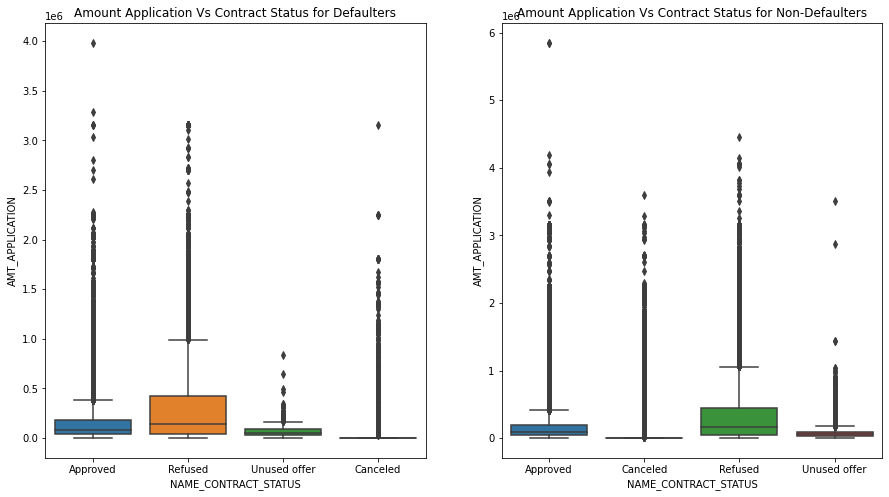

In [310]:
# AMT_APPLICATION vs NAME_CONTRACT_STATUS

plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
sns.boxplot(df_merge_d.NAME_CONTRACT_STATUS,df_merge_d.AMT_APPLICATION)
plt.title('Amount Application Vs Contract Status for Defaulters')
plt.subplot(1,2,2)
sns.boxplot(df_merge_nd.NAME_CONTRACT_STATUS,df_merge_nd.AMT_APPLICATION)
plt.title('Amount Application Vs Contract Status for Non-Defaulters')
plt.show()